<a href="https://colab.research.google.com/github/akshyeta/pFind/blob/feature-2/pFind_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**pFind Analysis** Scripts


# Collagen Sequences - Hi there


### COL1A1
* [Calf COL1A1 PO2453](https://www.uniprot.org/uniprotkb/P02453/entry) Bovine Collagen

*QLSYGYDEKSTGISVP*GPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEGGPQGPRGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGPPGPKGNSGEPGAPGSKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPAGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGAPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGAPGKDGVRGLTGPIGPPGPAGAPGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPAGPPGPIGNVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGSKGPRGETGPAGRPGEVGPPGPPGPAGEKGAPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPMGPPGLAGPPGESGREGAPGAEGSPGRDGSPGAKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPIGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGSPGKDGLNGLPGPIGPPGPRGRTGDAGPAGPPGPPGPPGPPGPP*SGGYDLSFLPQPPQEKAHDGGRYYRA*


 [Chicken COL1A1 PENSGALT00010061538.1](https://www.ensembl.org/Gallus_gallus/Transcript/Summary?db=core;g=ENSGALG00010025092;r=27:2738241-2755487;t=ENSGALT00010061420)
*QMSYGYDEKSAGVAVP*GPMGPAGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPAGPPGKNGDDGEAGKPGRPGQRGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGQPGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGPSGPAGARGNDGAPGAAGPPGPTGPAGPPGFPGAAGAKGETGPQGARGSEGPQGARGEPGPPGPAGAAGPAGNPGADGQPGAKGATGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDTGAKGEPGPAGVQGPPGPAGEEGKRGARGEPGPAGLPGPAGERGAPGSRGFPGADGIAGPKGPPGERGSPGAVGPKGSPGEAGRPGEPGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKPGERGAPGPPGAVGAAGKDGEAGAQGPPGPTGPAGERGEQGPAGAPGFQGLPGPAGPPGEAGKPGEQGVPGDAGAPGPAGARGERGFPGERGVQGPPGPQGPRGANGAPGNDGAKGDAGAPGAPGNQGPPGLQGMPGERGAAGLPGAKGDRGDPGPKGADGAPGKDGLRGLTGPIGPPGPAGAPGDKGEAGPPGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGETGDAGAKGDAGPPGPAGPTGAPGPAGAVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNIGLPGPPGPSGKEGGKGPRGETGPAGRPGEPGPAGPPGPPGEKGSPGADGPIGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSPGERGPPGPMGPPGLAGPPGEAGREGAPGAEGAPGRDGAAGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKNGDRGETGPAGPAGPPGPAGARGPAGPQGPRGDKGETGEQGDRGMKGHRGFSGLQGPPGPPGAPGEQGPSGASGPAGPRGPPGSAGAAGKDGLNGLPGPIGPPGPRGRTGEVGPVGPPGPPGPPGPPGPPSGGFDFSFLPQPPQEKAHDGGRYYRA

>sp|P02457|CO1A1_CHICK

QMSYGYDEKSAGVAVPGPMGPAGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPAGPPGKNGDDGEAGKPGRPGQRGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGQPGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGPSGPAGARGNDGAPGAAGPPGPTGPAGPPGFPGAAGAKGETGPQGARGSEGPQGSRGEPGPPGPAGAAGPAGNPGADGQPGAKGATGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDTGAKGEPGPAGVQGPPGPAGEEGKRGARGEPGPAGLPGPAGERGAPGSRGFPGADGIAGPKGPPGERGSPGAVGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPAGPPGARGQAGVMGFPGPKGAAGEPGKPGERGAPGPPGAVGAAGKDGEAGAQGPPGPTGPAGERGEQGPAGAPGFQGLPGPAGPPGEAGKPGEQGVPGNAGAPGPAGARGERGFPGERGVQGPPGPQGPRGANGAPGNDGAKGDAGAPGAPGNEGPPGLEGMPGERGAAGLPGAKGDRGDPGPKGADGAPGKDGLRGLTGPIGPPGPAGAPGDKGEAGPPGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGETGDAGAKGDAGPPGPAGPTGAPGPAGZVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNIGLPGPPGPAGKZGSKGPRGETGPAGRPGEPGPAGPPGPPGEKGSPGADGPIGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPMGPPGLAGPPGEAGREGAPGAEGAPGRDGAAGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKNGDRGETGPAGPAGPPGPAGARGPAGPQGPRGDKGETGEQGDRGMKGHRGFSGLQGPPGPPGAPGEQGPSGASGPAGPRGPPGSAGAAGKDGLNGLPGPIGPPGPRGRTGEVGPVGPPGPPGPPGPPGPPSGGFDLSFLPQPPQEKAHDGGRYYRA

 [Quail Coturnix japonica COL1A1 A0A8C2U9L6](https://www.uniprot.org/uniprotkb/A0A8C2U9L6/entry)
QMSYGYDEKSGGMAVPGPMVSGGLGVRVGFGGPQGFQGPPGEPGEPGASVSAGGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGEPGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGPSGPAVSIGDPGARPTPVPPPQGETGPQGARGSEGPQGARGEPGPPGPAGAAGPAGNPGADGQPGAKGATGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDTGAKGEPGPAGVQGPPGPAGEEGKRGARGEPGPAGLPGPAGERGAPGSRGFPGADGIAGPKGPPGERGAPGAVGPKGSPGEAGRPGEPGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKPGERGAPGPPGAVGAAGKDGEAGAQGPPGPTGPAGERGEQGPAGAPGFQGLPGPAGPPGEAGKPGEQGERGFPGERGVQGPPGPQGPRGANGAPGNDGAKGDAGAPGAPGNQGPPGLQGMPGERGAAGLPGAKGDR--------------------------------------APMWDAAPPDRSVSPLQGATGFPGAAGRVGPPGPSVSAEPPSRGGILPWHRGKGPRGETGPAGRPGEPGPAGPPGPPGEKGSPGADGPIGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSPGERGPPGPMGPPGLAGPPGEAGREGAPGAEGAPGRDGAAGPKVSTQGWGDGVGPQGPRGDKGETGDRGDRGMKGHRGFSGLQGPPGPPGAPGEQGPSGASGPHRGDTRGTHSVGVPPVGEAGPVGPPGPPGPPGPPGPPSGGFDFSFLPQPPQEKAHDGGRYYRA





[CO1A1 C0HJN3 Orycteropus afer (Aardvark)](https://www.uniprot.org/uniprotkb/C0HJN3/entry)

----------------GPMGPSGPRGIPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGIPGTAGIPGMKGHRGFSGIDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGIPGERGRPGPPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGPRGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDAGAKGEPGPAGIQGPPGPAGEEGKRGARGEPGPTGIPGPPGE------RGFPGSDGVAGPKGPVGERGSPGPAGPKGSPGEAGRPGEAGIPGAKGITGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGAPGKDGEAGAPGATGPAGPAGERGEQGPAGSPGFQGIPGPAGPPGESGKPGEQGIPGDIGAPGPSGARGERGFPGERGVQGPPGPAGPRGSNGAPGNDGAKGDAGAPGAPGSQGAPGIQGMPGERGAAGIPGPKGDRGDAGPKGADGSPGKDGPRGITGPIGPPGPAGAPGDKGESGPNGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPTGAPGPIGNVGAPGPKG---SPGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGK-------GETGPAGRPGEIGPPGPPGPSGEKGSPGADGPAGAPGTPGPQGIGGQRGVVGIPGQ---RGFPGIPGPSGEPGKQGPSGPNGERGPPGPMGPPGIAGPPGESGREGSPGAEGSPGRDGSPGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPIGPVGARGPTGPQGPRGDKGETGEQGD------RGFSGIQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGINGIPGPIGPPGPR--TGDAGPVGPPGPPGPPGPPGPP---------------------------

[COLA1 C0HLI1 Doedicurus sp. (South American giant glyptodont)](https://www.uniprot.org/uniprotkb/C0HLI1/entry)

------DEKSAGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGASGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGIAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPAGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAG-PGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRG-NGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGAPGKDGVRGLTGPIGPPGPAGATGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPSGPAGPTGPPGPIGNVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPVGKEGGKGPRGETGPAGRPGEVGPPGPPGPSGEKGSPGADGPAGAPGTPGPQGI-GQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSSGERGPPGPMGPPGLAGPPGEAGREGSPGAEGSPGRDGSPGPKGDRGETGP-GPPGAPGAPGAPGPVGPAGKSGDRGETGPSGPAGPAGPAGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPAGPPGSPGEQGPSGASGPAGPRGPPGSAGTPGKDGLNGLPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPP--------------------------

>sp|P02452|CO1A1_HUMAN

QLSYGYDEKSTGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGPRGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPGGPPGPKGNSGEPGAPGSKGDTGAKGEPGPVGVQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGVRGLTGPIGPPGPAGAPGDKGESGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPAGPPGPIGNVGAPGAKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGGKGPRGETGPAGRPGEVGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPMGPPGLAGPPGESGREGAPGAEGSPGRDGSPGAKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPVGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGLNGLPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSAGFDFSFLPQPPQEKAHDGGRYYRA


[CO1A1 Q9XSJ7 Dog](https://www.uniprot.org/uniprotkb/Q9XSJ7/entry)

QMSYGYDEKSTGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGPPGPKGNSGEPGAPGNKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGVRGLTGPIGPPGPAGAPGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPTGPPGPIGNVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGGKGARGETGPAGRPGEVGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGTSGERGPPGPMGPPGLAGPPGESGREGSPGAEGSPGRDGSPGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKNGDRGETGPAGPAGPIGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGSPGKDGLNGLPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSGGFDFSFLPQPPQEKAHDGGRYYRA


[CO1A1 P0C2W8 Mammoth](https://www.uniprot.org/uniprotkb/P0C2W8/entry)

QLSYGYDEKSAGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPAGPQGPSGAPGPKGNSGEPGAPGSKGDAGAKGEPGPIGIQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGAAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGSNGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGPRGLTGPIGPPGPAGAPGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPTGAPGPIGNVGAPGAKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGGKGPRGETGPAGRPGEVGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIGGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSSGERGPPGPAGPPGLAGPPGESGREGAPGAEGSPGRDGSPGPKGDRGETGPSGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPAGPAGVRGPAGPQGPRGDKGETGEQGDRGLKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGLNGLPGPPGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSGAFDFSFLPQPPQEKAHDGGRYYRA


[CO1A1 C0HJN9 Horse](https://www.uniprot.org/uniprotkb/C0HJN9/entry)

-----------------GPMGPSGPRGIPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGIPGTAGIPGMK---GFSGIDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGIPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGPPGPKGNSGEPGAPGNKGDTGAKGEPGPTGIQGPPGPAGEEGKR---GEPGPIGIPGPPG------ERGFPGADGVAGPKGPAGERGAPGPAGPKGSPGEAGRPGEAGIPGAKGITGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGK----GVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGIPGPAGPPGESGKPGEQGVPGDIGAPGPSGA---RGFPGERGVQGPPGPAGPRS----------------------QGAPGIQGMPGERGAAGIPGPKGDRGDAGPK------------GITGPIGPPGPAGAPGDKGETGPSGPAGPTGAR-----RGEPGPPGPAGFAGPPGADGQPGAK---------GDAGPPGPAGPAGPPGPIGSVGAPGPK---GSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPVG----KGPRGETGPAGRPGEAGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGIPGQ---RGFPGIPGPSGEPGKQGPSGASGERGPPGPVGPPGIAGPPGESGREGSPGAEGSAGRDGSPGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGEAGPAGPAGPIGPVGARGPAGPQGP------------------RGFSGIQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGINGIPGPIGPPGPR--------------------------------------------------


[CO1A1 B9VR88 Donkey Equus asinus](https://www.uniprot.org/uniprotkb/B9VR88/entry)

QLSYGYDEKSA-GISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGPPGPKGNSGEPGAPGNKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGARGFPGADGVAGPKGPAGERGAPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGESGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGSNGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGVRGLTGPIGPPGPAGAPGDKGETGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPAGPPGPIGSVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPVGKEGGKGPRGETGPAGRPGEAGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPVGPPGLAGPPGESGREGSPGAEGSPGRDGSPGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGEAGPAGPAGPIGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGLNGLPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSAGFDFSFLPQPPQEKSHDGGRYYRA


[CO1A1 C0HJN7 CO1A1_TAPTE  Tapirus terrestris (Lowland tapir) (Brazilian tapir)](https://www.uniprot.org/uniprotkb/C0HJN7/entry)

-----------------GPMGPSGPRGIPGPPGAPGPQGFA-----------SGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGIPGTAGIPGMKGHRGFSGIDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGIPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGPPGPKGNSGEPGAPGSKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPTGIPGPPGERGGPGARGFPGSDGVAGPKGPAGERGAPGPAGPKGSPGEAGRPGEAGIPGAKGITGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPG-------------------------IGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGA---------------KGIQGMPGERGAAGIPGPKGDRGDAGPKGADGSPGKDGVRGITGPIGPPGPAGAPGDKGESGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPTGPPGPIGNVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPVGKEGGKGPRGETGPAGRPGEAGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIAGQRGVVGIPGQRGERGFPGIPGPSGEPGKQGPSGASGERGPPGPVGPPGIAGPPGESGREGAPGAEGSPGRDGSPGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPIGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGIQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGINGIPGPIGPPGPRGRTGDAGPVGPPGPPGPPGPPGPP--------------------------


[CO1A1 C0HJN5 Hippopotamus amphibius (Hippopotamus)](https://www.uniprot.org/uniprotkb/C0HJN5/entry)

-----------------GPMGPSGPRGIPGPPGAPGPQGFP------GEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPSGPQGARGIPGTAGIPGMKGHRGFSGIDGAKGDAGPAGPKG---------APGQMGPRGIPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAA---------------GANGAPGIAGAPGFPGARGPSGPQGPSGPSGPKGNSGEPGAPGSKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPAGIPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGIPGAKGITGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGIPGPAGPPGEAGKPGEQGVPGDIGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGIQGMPGERGAAGIPGPKGDRGDAGPKGADGSPGKDGVRGITGPIGPPGPAGAPGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKG----------TGPPGPIGNVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPVGK------RGETGPAGRPGEVGPPGPPGPAGEKGAPGADGPAGAPGTPGPQGIAGQRGVVGIPGQRGERGFPGIPGPSGEPGKQGPSGTSGERGPPGPMGPPGIAGPPGESGREGAPGAEGSPGRDGSPGAKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPIGPVGARGAAGPQGPRGDKGETGEQGDRGIKGHRGFSGIQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGSPGKDGINGIPGPIGPPGPRP-----------GPPGPPGPPGPP--------------------------




### COL1A2
* [Calf COL1A2 P02465](https://www.uniprot.org/uniprotkb/P02465/entry)

QFDAKGGGPGPMGLMGPRGPPGASGAPGPQGFQGPPGEPGEPGQTGPAGARGPPGPPGKAGEDGHPGKPGRPGERGVVGPQGARGFPGTPGLPGFKGIRGHNGLDGLKGQPGAPGVKGEPGAPGENGTPGQTGARGLPGERGRVGAPGPAGARGSDGSVGPVGPAGPIGSAGPPGFPGAPGPKGELGPVGNPGPAGPAGPRGEVGLPGLSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPVGAAGATGARGLVGEPGPAGSKGESGNKGEPGAVGQPGPPGPSGEEGKRGSTGEIGPAGPPGPPGLRGNPGSRGLPGADGRAGVMGPAGSRGATGPAGVRGPNGDSGRPGEPGLMGPRGFPGSPGNIGPAGKEGPVGLPGIDGRPGPIGPAGARGEPGNIGFPGPKGPSGDPGKAGEKGHAGLAGARGAPGPDGNNGAQGPPGLQGVQGGKGEQGPAGPPGFQGLPGPAGTAGEAGKPGERGIPGEFGLPGPAGARGERGPPGESGAAGPTGPIGSRGPSGPPGPDGNKGEPGVVGAPGTAGPSGPSGLPGERGAAGIPGGKGEKGETGLRGDIGSPGRDGARGAPGAIGAPGPAGANGDRGEAGPAGPAGPAGPRGSPGERGEVGPAGPNGFAGPAGAAGQPGAKGERGTKGPKGENGPVGPTGPVGAAGPSGPNGPPGPAGSRGDGGPPGATGFPGAAGRTGPPGPSGISGPPGPPGPAGKEGLRGPRGDQGPVGRSGETGASGPPGFVGEKGPSGEPGTAGPPGTPGPQGLLGAPGFLGLPGSRGERGLPGVAGSVGEPGPLGIAGPPGARGPPGNVGNPGVNGAPGEAGRDGNPGNDGPPGRDGQPGHKGERGYPGNAGPVGAAGAPGPQGPVGPVGKHGNRGEPGPAGAVGPAGAVGPRGPSGPQGIRGDKGEPGDKGPRGLPGLKGHNGLQGLPGLAGHHGDQGAPGAVGPAGPRGPAGPSGPAGKDGRIGQPGAVGPAGIRGSQGSQGPAGPPGPPGPPGPPGPSGGGYEFGFDGDFYRA


* [Sheep W5NTT7](https://www.uniprot.org/uniprotkb/W5NTT7/entry)
* [Goat COL1A2 ](https://www.ensembl.org/Capra_hircus/Transcript/Sequence_Protein?db=core;g=ENSCHIG00000025647;r=4:108820558-108856519;t=ENSCHIT00000039063)
GLMGPRGPPGASGAPGPQGFQGPPGEPGEPGQTGARGLPGERGRVGAPGPAGAR
GSDGSVGPVGPAGPIGSAGPPGFPGAPGPKGELGPVGNPGPAGPAGPRGEVGLPGLSGPV
GPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPVGAAGATGARGLVVSGRVLLYL
MEEFSLIFFCVLCALFQGNPGSRGLPGADGRAGVMGPAGSRGATGPAGVRGPNGDSGRPG
EPGLMGPRGFPGSPGNIGPAGKEGPAGLPGIDGRPGPIGPAGARGEPGNIGFPGPKGPTV
RITTTSSPSALFCITIHQNSHFSLASGPSTSRGPLQHKKTGERGPPGESGAAGPTGPIGS
RGPSGPPGPDGNKGEPGVVGAPGTAGPSGPSGLPGERGAAGIPGGKGEKVRSPHWALTHT
GEAGPAGPAGPAGPRGSPGERGEVGPAGPNGFAGPAGAAGQPGAKGERGTKGPKGENGPV
GPTGPVGAAGPSGPNGPPGPAGSRGDGGPPVSTYPGFGISGPPGPPGPAGKEGLRGPRGD
QGPVGRTGEPGAAGPPGFVGEKGPSGEPGTAGPPGTPGPQGFLGPPGFLGLPGSRGERGL
PGRVLYWALGVMTAGSPTVRGRWATVSLSGNPGNDGPPGRDGQPGHKGERGYPGNAGPVG
AAGAPGPQGPVGPTGKHGSRGEPGPVGAVGPAGAVGPRGPSGPQGIRGDKGEPGDKGPRG
LPGLKGHNGLQGLPGLAGHHGDQGAPGAVGPAGPRGPAGPTGPAGKDGRTGQPGAVGPAG
IRGSQGSQGPAGPPGPPGPPGPPGPS


* [Chicken COL1A2](https://www.uniprot.org/uniprotkb/P02467/entry#ptm_processing)
QYDPSKAADFGPGPMGLMGPRGPPGASGPPGPPGFQGVPGEPGEPGQTGPQGPRGPPGPPGKAGEDGHPGKPGRPGERGVAGPQGARGFPGTPGLPGFKGIRGHNGLDGQKGQPGTPGTKGEPGAPGENGTPGQPGARGLPGERGRIGAPGPAGARGSDGSAGPTGPAGPIGAAGPPGFPGAPGAKGEIGPAGNVGPTGPAGPRGEIGLPGSSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPPGPAGPSGARGLVGEPGPAGAKGESGNKGEPGAAGPPGPPGPSGEEGKRGSNGEPGSAGPPGPAGLRGVPGSRGLPGADGRAGVMGPAGNRGASGPVGAKGPNGDAGRPGEPGLMGPRGLPGQPGSPGPAGKEGPVGFPGADGRVGPIGPAGNRGEPGNIGFPGPKGPTGEPGKPGEKGNVGLAGPRGAPGPEGNNGAQGPPGVTGNQGAKGETGPAGPPGFQGLPGPSGPAGEAGKPGERGLHGEFGVPGPAGPRGERGLPGESGAVGPAGPIGSRGPSGPPGPDGNKGEPGNVGPAGAPGPAGPGGIPGERGVAGVPGGKGEKGAPGLRGDTGATGRDGARGLPGAIGAPGPAGGAGDRGEGGPAGPAGPAGARGIPGERGEPGPVGPSGFAGPPGAAGQPGAKGERGPKGPKGETGPTGAIGPIGASGPPGPVGAAGPAGPRGDAGPPGMTGFPGAAGRVGPPGPAGITGPPGPPGPAGKDGPRGLRGDVGPVGRTGEQGIAGPPGFAGEKGPSGEAGAAGPPGTPGPQGILGAPGILGLPGSRGERGLPGIAGATGEPGPLGVSGPPGARGPSGPVGSPGPNGAPGEAGRDGNPGNDGPPGRDGAPGFKGERGAPGNPGPSGALGAPGPHGQVGPSGKPGNRGDPGPVGPVGPAGAFGPRGLAGPQGPRGEKGEPGDKGHRGLPGLKGHNGLQGLPGLAGQHGDQGPPGNNGPAGPRGPPGPSGPPGKDGRNGLPGPIGPAGVRGSHGSQGPAGPPGPPGPPGPPGPNGGGYEVGFDAEYYR


>sp|P02465|CO1A2_BOVIN

QFDAKGGGPGPMGLMGPRGPPGASGAPGPQGFQGPPGEPGEPGQTGPAGARGPPGPPGKAGEDGHPGKPGRPGERGVVGPQGARGFPGTPGLPGFKGIRGHNGLDGLKGQPGAPGVKGEPGAPGENGTPGQTGARGLPGERGRVGAPGPAGARGSDGSVGPVGPAGPIGSAGPPGFPGAPGPKGELGPVGNPGPAGPAGPRGEVGLPGLSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPVGAAGATGARGLVGEPGPAGSKGESGNKGEPGAVGQPGPPGPSGEEGKRGSTGEIGPAGPPGPPGLRGNPGSRGLPGADGRAGVMGPAGSRGATGPAGVRGPNGDSGRPGEPGLMGPRGFPGSPGNIGPAGKEGPVGLPGIDGRPGPIGPAGARGEPGNIGFPGPKGPSGDPGKAGEKGHAGLAGARGAPGPDGNNGAQGPPGLQGVQGGKGEQGPAGPPGFQGLPGPAGTAGEAGKPGERGIPGEFGLPGPAGARGERGPPGESGAAGPTGPIGSRGPSGPPGPDGNKGEPGVVGAPGTAGPSGPSGLPGERGAAGIPGGKGEKGETGLRGDIGSPGRDGARGAPGAIGAPGPAGANGDRGEAGPAGPAGPAGPRGSPGERGEVGPAGPNGFAGPAGAAGQPGAKGERGTKGPKGENGPVGPTGPVGAAGPSGPNGPPGPAGSRGDGGPPGATGFPGAAGRTGPPGPSGISGPPGPPGPAGKEGLRGPRGDQGPVGRSGETGASGPPGFVGEKGPSGEPGTAGPPGTPGPQGLLGAPGFLGLPGSRGERGLPGVAGSVGEPGPLGIAGPPGARGPPGNVGNPGVNGAPGEAGRDGNPGNDGPPGRDGQPGHKGERGYPGNAGPVGAAGAPGPQGPVGPVGKHGNRGEPGPAGAVGPAGAVGPRGPSGPQGIRGDKGEPGDKGPRGLPGLKGHNGLQGLPGLAGHHGDQGAPGAVGPAGPRGPAGPSGPAGKDGRIGQPGAVGPAGIRGSQGSQGPAGPPGPPGPPGPPGPSGGGYEFGFDGDFYRA

>sp|P02467|CO1A2_CHICK

QYDPSKAADFGPGPMGLMGPRGPPGASGPPGPPGFQGVPGEPGEPGQTGPQGPRGPPGPPGKAGEDGHPGKPGRPGERGVAGPQGARGFPGTPGLPGFKGIRGHNGLDGQKGQPGTPGTKGEPGAPGENGTPGQPGARGLPGERGRIGAPGPAGARGSDGSAGPTGPAGPIGAAGPPGFPGAPGAKGEIGPAGNVGPTGPAGPRGEIGLPGSSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPPGPAGPSGARGLVGEPGPAGAKGESGNKGEPGAAGPPGPPGPSGEEGKRGSNGEPGSAGPPGPAGLRGVPGSRGLPGADGRAGVMGPAGNRGASGPVGAKGPNGDAGRPGEPGLMGPRGLPGQPGSPGPAGKEGPVGFPGADGRVGPIGPAGNRGEPGNIGFPGPKGPTGEPGKPGEKGNVGLAGPRGAPGPEGNNGAQGPPGVTGNQGAKGETGPAGPPGFQGLPGPSGPAGEAGKPGERGLHGEFGVPGPAGPRGERGLPGESGAVGPAGPIGSRGPSGPPGPDGNKGEPGNVGPAGAPGPAGPGGIPGERGVAGVPGGKGEKGAPGLRGDTGATGRDGARGLPGAIGAPGPAGGAGDRGEGGPAGPAGPAGARGIPGERGEPGPVGPSGFAGPPGAAGQPGAKGERGPKGPKGETGPTGAIGPIGASGPPGPVGAAGPAGPRGDAGPPGMTGFPGAAGRVGPPGPAGITGPPGPPGPAGKDGPRGLRGDVGPVGRTGEQGIAGPPGFAGEKGPSGEAGAAGPPGTPGPQGILGAPGILGLPGSRGERGLPGIAGATGEPGPLGVSGPPGARGPSGPVGSPGPNGAPGEAGRDGNPGNDGPPGRDGAPGFKGERGAPGNPGPSGALGAPGPHGQVGPSGKPGNRGDPGPVGPVGPAGAFGPRGLAGPQGPRGEKGEPGDKGHRGLPGLKGHNGLQGLPGLAGQHGDQGPPGNNGPAGPRGPPGPSGPPGKDGRNGLPGPIGPAGVRGSHGSQGPAGPPGPPGPPGPPGPNGGGYEVGFDAEYYRA

>tr|A0A5H1ZRJ7|A0A5H1ZRJ7_CHICK

QYDPSKAADFGPGPMGLMGPRGPPGASGPPGPPGFQGVPGEPGEPGQTGPQGPRGPPGPPGKAGEDGHPGKPGRPGERGVAGPQGARGFPGTPGLPGFKGIRGHNGLDGQKGQPGTPGTKGEPGAPGENGTPGQPGARGLPGERGRIGAPGPAGARGSDGSAGPTGPAGPIGAAGPPGFPGAPGAKGEIGPAGNVGPTGPAGPRGEIGLPGSSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPPGPAGPSGARGLVGEPGPAGAKGESGNKGEPGAAGPPGPPGPSGEEGKRGSNGEPGSAGPPGPAGLRGVPGSRGLPGADGRAGVMGPAGNRGASGPVGAKGPNGDAGRPGEPGLMGPRGLPGQPGSPGPAGKEGPVGFPGADGRVGPIGPAGNRGEPGNIGFPGPKGPTGEPGKPGEKGNVGLAGPRGAPGPEGNNGAQGPPGVTGNQGAKGETGPAGPPGFQGLPGPSGPAGEAGKPGERGLHGEFGVPGPAGPRGERGLPGESGAVGPAGPIGSRGPSGPPGPDGNKGEPGNVGPAGAPGPAGPGGIPGERGVAGVPGGKGEKGAPGLRGDTGATGRDGARGLPGAIGAPGPAGGAGDRGEGGPAGPAGPAGARGIPGERGEPGPVGPSGFAGPPGAAGQPGAKGERGPKGPKGETGPTGAIGPIGASGPPGPVGAAGPAGPRGDAGPPGMTGFPGAAGRVGPPGPAGITGPPGPPGPAGKDGPRGLRGDVGPVGRTGEQGIAGPPGFAGEKGPSGEAGAAGPPGTPGPQGILGAPGILGLPGSRGERGLPGIAGATGEPGPLGVSGPPGARGPSGPVGSPGPNGAPGEAGRDGNPGNDGPPGRDGAPGFKGERGAPGNPGPSGALGAPGPHGQVGPSGKPGNRGDPGPVGPVGPAGAFGPRGLAGPQGPRGEKGEPGDKGHRGLPGLKGHNGLQGLPGLAGQHGDQGPPGNNGPAGPRGPPGPSGPPGKDGRNGLPGPIGPAGVRGSHGSQGPAGPPGPPGPPGPPGPNGGGYEVGFDAEYYRA

### COL3A1

* [Sheep COL3A1 W5Q4S0](https://www.uniprot.org/uniprotkb/W5Q4S0/entry)
* [Calf COL3A1 P04258](https://www.uniprot.org/uniprotkb/P04258/entry)

QYEAYDVKSGVAGGGIAGYPGPAGPPG
PPGPPGTSGHPGAPGAPGYQGPPGEPGQAGPAGPPGPPGAIGPSGPAGKDGESGRPGRPG
ERGFPGPPGMKGPAGMPGFPGMKGHRGFDGRNGEKGETGAPGLKGENGVPGENGAPGPMG
PRGAPGERGRPGLPGAAGARGNDGARGSDGQPGPPGPPGTAGFPGSPGAKGEVGPAGSPG
SSGAPGQRGEPGPQGHAGAPGPPGPPGSNGSPGGKGEMGPAGIPGAPGLIGARGPPGPPG
TNGVPGQRGAAGEPGKNGAKGDPGPRGERGEAGSPGIAGPKGEDGKDGSPGEPGANGLPG
AAGERGVPGFRGPAGANGLPGEKGPPGDRGGPGPAGPRGVAGEPGRDGLPGGPGLRGIPG
SPGGPGSDGKPGPPGSQGETGRPGPPGSPGPRGQPGVMGFPGPKGNDGAPGKNGERGGPG
GPGPQGPAGKNGETGPQGPPGPTGPSGDKGDTGPPGPQGLQGLPGTSGPPGENGKPGEPG
PKGEAGAPGIPGGKGDSGAPGERGPPGAGGPPGPRGGAGPPGPEGGKGAAGPPGPPGSAG
TPGLQGMPGERGGPGGPGPKGDKGEPGSSGVDGAPGKDGPRGPTGPIGPPGPAGQPGDKG
ESGAPGVPGIAGPRGGPGERGEQGPPGPAGFPGAPGQNGEPGAKGERGAPGEKGEGGPPG
AAGPAGGSGPAGPPGPQGVKGERGSPGGPGAAGFPGGRGPPGPPGSNGNPGPPGSSGAPG
KDGPPGPPGSNGAPGSPGISGPKGDSGPPGERGAPGPQGPPGAPGPLGIAGLTGARGLAG
PPGMPGARGSPGPQGIKGENGKPGPSGQNGERGPPGPQGLPGLAGTAGEPGRDGNPGSDG
LPGRDGAPGAKGDRGENGSPGAPGAPGHPGPPGPVGPAGKSGDRGETGPAGPSGAPGPAG
SRGPPGPQGPRGDKGETGERGAMGIKGHRGFPGNPGAPGSPGPAGHQGAVGSPGPAGPRG
PVGPSGPPGKDGASGHPGPIGPPGPRGNRGERGSEGSPGHPGQPGPPGPPGAPGPCCGAG
GVAAIAGVGAEKAGGFAPYY


* [Goat COL3A1 XM_005675869](https://www.ncbi.nlm.nih.gov/nucleotide/XM_005675869.3?report=genbank&log$=nuclalign&blast_rank=1&RID=WA5BB2HB016)

*[Chicken COL3A1](https://www.uniprot.org/uniprotkb/A0A1D5PE57/entry)

  QYDSYDVKAGSVGMGYPPQPISGFPGPPGPSGPPGPPGHAGPPGSNGYQGPPGEPGQPGPSGPPGPAGMIGPAGPPGKDGEPGRPGRNGDRGIPGLPGHKGHPGMPGMPGMKGARGFDGKDGAKGDSGAPGPKGEAGQPGANGSPGQPGPGGPTGERGRPGNPGGPGAHGKDGAPGTAGPLGPPGPPGTAGFPGSPGFKGEAGPPGPAGASGNPGERGEPGPQGQAGPPGPQGPPGRAGSPGGKGEMGPSGIPGGPGPPGGRGLPGPPGTSGNPGAKGTPGEPGKNGAKGDPGPKGERGENGTPGARGPPGEEGKRGANGEPGQNGVPGTPGERGSPGFRGLPGSNGLPGEKGPAGERGSPGPPGPSGPAGDRGQDGGPGLPGMRGLPGIPGSPGSDGKPGPPGNQGEPGRSGPPGPAGPRGQPGVMGFPGPKGNEGAPGKNGERGPGGPPGTPGPAGKNGDVGLPGPPGPAGPAGDRGEPGPSGSPGLQGLPGGPGPAGENGKPGEPGPKGDIGGPGFPGPKGENGIPGERGPQGPPGPTGARGGPGPAGSEGAKGPPGPPGAPGGTGLPGLQGMPGERGASGSPGPKGDKGEPGGKGADGLPGARGERGNVGPIGPPGPAGPPGDKGETGPAGAPGPAGSRGGPGERGEQGLPGPAGFPGAPGQNGEPGGKGERGPPGLRGEAGPPGAAGPQGGPGAPGPPGPQGVKGERGSPGGPGAAGFPGARGPPGPPGNNGDRGESGPPGVPGPPGHPGPAGNNGAPGKAGERGFQGPLGPQGAIGSPGASGARGPPGPAGPPGKDGRGGYPGPIGPPGPRGNRGESGPAGPPGQPGLPGPSGPPGPCCGGGVASLGAGEKGPVGYGYEYR

  






# Global Varibles

## Import Packages

In [ ]:
# Data manipulation:
import pandas as pd
from itertools import islice
#import sketch
from collections import Counter

# Debugging:
import traceback

# File I/O and path handling:
import os
import copy, os
import re
import requests
import json
from typing import Dict, Any


# Numerical analysis and statistics:
import numpy as np
from scipy import stats
from statistics import mode, multimode  # Consider removing if unused

# Data visualization:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Third-party modules (Commented out modules can be imported as needed):
# from Bio import SeqIO  # Only import if used
# from icecream import ic  # Import on demand if needed

# Google Colab specific for mounting Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Sequences

In [ ]:
collagen_sequences = {
    'Bov_COL1A1': {'offset': -7, 'sequence': 'STGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEGGPQGPRGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPSGPQGPSGPPGPKGNSGEPGAPGSKGDTGAKGEPGPTGIQGPPGPAGEEGKRGARGEPGPAGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGAPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGPAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGANGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGAPGKDGVRGLTGPIGPPGPAGAPGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPAGPPGPIGNVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGSKGPRGETGPAGRPGEVGPPGPPGPAGEKGAPGADGPAGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGASGERGPPGPMGPPGLAGPPGESGREGAPGAEGSPGRDGSPGAKGDRGETGPAGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPIGPVGARGPAGPQGPRGDKGETGEQGDRGIKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGSPGKDGLNGLPGPIGPPGPRGRTGDAGPAGPPGPPGPPGPPGPPSGGYDLSFLPQPPQEK'},
    'Mam_COL1A1': {'offset': -8, 'sequence': 'SAGGISVPGPMGPSGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPPGPPGKNGDDGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGDAGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDGATGAAGPPGPTGPAGPPGFPGAVGAKGEAGPQGARGSEGPQGVRGEPGPPGPAGAAGPAGNPGADGQPGAKGANGAPGIAGAPGFPGARGPAGPQGPSGAPGPKGNSGEPGAPGSKGDAGAKGEPGPIGIQGPPGPAGEEGKRGARGEPGPTGLPGPPGERGGPGSRGFPGADGVAGPKGPAGERGSPGPAGPKGSPGEAGRPGEAGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKAGERGVPGPPGAVGAAGKDGEAGAQGPPGPAGPAGERGEQGPAGSPGFQGLPGPAGPPGEAGKPGEQGVPGDLGAPGPSGARGERGFPGERGVQGPPGPAGPRGSNGAPGNDGAKGDAGAPGAPGSQGAPGLQGMPGERGAAGLPGPKGDRGDAGPKGADGSPGKDGPRGLTGPIGPPGPAGAPGDKGEAGPSGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGEPGDAGAKGDAGPPGPAGPTGAPGPIGNVGAPGAKGARGSAGPPGATGFPGAAGRVGPPGPSGNAGPPGPPGPAGKEGGKGPRGETGPAGRPGEVGPPGPPGPAGEKGSPGADGPAGAPGTPGPQGIGGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSSGERGPPGPAGPPGLAGPPGESGREGAPGAEGSPGRDGSPGPKGDRGETGPSGPPGAPGAPGAPGPVGPAGKSGDRGETGPAGPAGPAGPAGVRGPAGPQGPRGDKGETGEQGDRGLKGHRGFSGLQGPPGPPGSPGEQGPSGASGPAGPRGPPGSAGAPGKDGLNGLPGPPGPPGPRGRTGDAGPVGPPGPPGPPGPPGPPSGAFDFSFLPQPPQEK'},
    'Chk_COL1A1': {'offset': -7, 'sequence': 'SAGVAVPGPMGPAGPRGLPGPPGAPGPQGFQGPPGEPGEPGASGPMGPRGPAGPPGKNGDDGEAGKPGRPGQRGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGQPGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGPSGPAGARGNDGAPGAAGPPGPTGPAGPPGFPGAAGAKGETGPQGARGSEGPQGARGEPGPPGPAGAAGPAGNPGADGQPGAKGATGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDTGAKGEPGPAGVQGPPGPAGEEGKRGARGEPGPAGLPGPAGERGAPGSRGFPGADGIAGPKGPPGERGSPGAVGPKGSPGEAGRPGEPGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKPGERGAPGPPGAVGAAGKDGEAGAQGPPGPTGPAGERGEQGPAGAPGFQGLPGPAGPPGEAGKPGEQGVPGDAGAPGPAGARGERGFPGERGVQGPPGPQGPRGANGAPGNDGAKGDAGAPGAPGNQGPPGLQGMPGERGAAGLPGAKGDRGDPGPKGADGAPGKDGLRGLTGPIGPPGPAGAPGDKGEAGPPGPAGPTGARGAPGDRGEPGPPGPAGFAGPPGADGQPGAKGETGDAGAKGDAGPPGPAGPTGAPGPAGAVGAPGPKGARGSAGPPGATGFPGAAGRVGPPGPSGNIGLPGPPGPSGKEGGKGPRGETGPAGRPGEPGPAGPPGPPGEKGSPGADGPIGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSPGERGPPGPMGPPGLAGPPGEAGREGAPGAEGAPGRDGAAGPKGDRGETGPAGPPGAPGAPGAPGPVGPAGKNGDRGETGPAGPAGPPGPAGARGPAGPQGPRGDKGETGEQGDRGMKGHRGFSGLQGPPGPPGAPGEQGPSGASGPAGPRGPPGSAGAAGKDGLNGLPGPIGPPGPRGRTGEVGPVGPPGPPGPPGPPGPPSGGFDFSFLPQPPQEK'},
    'Bov_COL1A2': {'offset': -4, 'sequence': 'GGGPGPMGLMGPRGPPGASGAPGPQGFQGPPGEPGEPGQTGPAGARGPPGPPGKAGEDGHPGKPGRPGERGVVGPQGARGFPGTPGLPGFKGIRGHNGLDGLKGQPGAPGVKGEPGAPGENGTPGQTGARGLPGERGRVGAPGPAGARGSDGSVGPVGPAGPIGSAGPPGFPGAPGPKGELGPVGNPGPAGPAGPRGEVGLPGLSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPVGAAGATGARGLVGEPGPAGSKGESGNKGEPGAVGQPGPPGPSGEEGKRGSTGEIGPAGPPGPPGLRGNPGSRGLPGADGRAGVMGPAGSRGATGPAGVRGPNGDSGRPGEPGLMGPRGFPGSPGNIGPAGKEGPVGLPGIDGRPGPIGPAGARGEPGNIGFPGPKGPSGDPGKAGEKGHAGLAGARGAPGPDGNNGAQGPPGLQGVQGGKGEQGPAGPPGFQGLPGPAGTAGEAGKPGERGIPGEFGLPGPAGARGERGPPGESGAAGPTGPIGSRGPSGPPGPDGNKGEPGVVGAPGTAGPSGPSGLPGERGAAGIPGGKGEKGETGLRGDIGSPGRDGARGAPGAIGAPGPAGANGDRGEAGPAGPAGPAGPRGSPGERGEVGPAGPNGFAGPAGAAGQPGAKGERGTKGPKGENGPVGPTGPVGAAGPSGPNGPPGPAGSRGDGGPPGATGFPGAAGRTGPPGPSGISGPPGPPGPAGKEGLRGPRGDQGPVGRSGETGASGPPGFVGEKGPSGEPGTAGPPGTPGPQGLLGAPGFLGLPGSRGERGLPGVAGSVGEPGPLGIAGPPGARGPPGNVGNPGVNGAPGEAGRDGNPGNDGPPGRDGQPGHKGERGYPGNAGPVGAAGAPGPQGPVGPVGKHGNRGEPGPAGAVGPAGAVGPRGPSGPQGIRGDKGEPGDKGPRGLPGLKGHNGLQGLPGLAGHHGDQGAPGAVGPAGPRGPAGPSGPAGKDGRIGQPGAVGPAGIRGSQGSQGPAGPPGPPGPPGPPGPSGGGYEFGFDGDFYR'},
    'Chk_COL1A2': {'offset': -6, 'sequence': 'AADFGPGPMGLMGPRGPPGASGPPGPPGFQGVPGEPGEPGQTGPQGPRGPPGPPGKAGEDGHPGKPGRPGERGVAGPQGARGFPGTPGLPGFKGIRGHNGLDGQKGQPGTPGTKGEPGAPGENGTPGQPGARGLPGERGRIGAPGPAGARGSDGSAGPTGPAGPIGAAGPPGFPGAPGAKGEIGPAGNVGPTGPAGPRGEIGLPGSSGPVGPPGNPGANGLPGAKGAAGLPGVAGAPGLPGPRGIPGPPGPAGPSGARGLVGEPGPAGAKGESGNKGEPGAAGPPGPPGPSGEEGKRGSNGEPGSAGPPGPAGLRGVPGSRGLPGADGRAGVMGPAGNRGASGPVGAKGPNGDAGRPGEPGLMGPRGLPGQPGSPGPAGKEGPVGFPGADGRVGPIGPAGNRGEPGNIGFPGPKGPTGEPGKPGEKGNVGLAGPRGAPGPEGNNGAQGPPGVTGNQGAKGETGPAGPPGFQGLPGPSGPAGEAGKPGERGLHGEFGVPGPAGPRGERGLPGESGAVGPAGPIGSRGPSGPPGPDGNKGEPGNVGPAGAPGPAGPGGIPGERGVAGVPGGKGEKGAPGLRGDTGATGRDGARGLPGAIGAPGPAGGAGDRGEGGPAGPAGPAGARGIPGERGEPGPVGPSGFAGPPGAAGQPGAKGERGPKGPKGETGPTGAIGPIGASGPPGPVGAAGPAGPRGDAGPPGMTGFPGAAGRVGPPGPAGITGPPGPPGPAGKDGPRGLRGDVGPVGRTGEQGIAGPPGFAGEKGPSGEAGAAGPPGTPGPQGILGAPGILGLPGSRGERGLPGIAGATGEPGPLGVSGPPGARGPSGPVGSPGPNGAPGEAGRDGNPGNDGPPGRDGAPGFKGERGAPGNPGPSGALGAPGPHGQVGPSGKPGNRGDPGPVGPVGPAGAFGPRGLAGPQGPRGEKGEPGDKGHRGLPGLKGHNGLQGLPGLAGQHGDQGPPGNNGPAGPRGPPGPSGPPGKDGRNGLPGPIGPAGVRGSHGSQGPAGPPGPPGPPGPPGPNGGGYEVGFDAEYYR'},
   #'Qyl_COL1A?': {'offset': -7, 'sequence': 'SGGMAVPGPM---VSGGLGVRVGFGGPQGFQGPPGEPGEPGAS----------------------------------------------------------------------------------------------------------------------------------------------------------------VSAGGEAGKPGRPGERGPPGPQGARGLPGTAGLPGMKGHRGFSGLDGAKGEPGPAGPKGEPGSPGENGAPGQMGPRGLPGERGRPGPSGPAVSIGDPGARPTPVPPPQGETGPQGARGSEGPQGARGEPGPPGPAGAAGPAGNPGADGQPGAKGATGAPGIAGAPGFPGARGPSGPQGPSGAPGPKGNSGEPGAPGNKGDTGAKGEPGPAGVQGPPGPAGEEGKRGARGEPGPAGLPGPAGERGAPGSRGFPGADGIAGPKGPPGERGAPGAVGPKGSPGEAGRPGEPGLPGAKGLTGSPGSPGPDGKTGPPGPAGQDGRPGPPGPPGARGQAGVMGFPGPKGAAGEPGKPGERGAPGPPGAVGAAGKDGEAGAQGPPGPTGPAGERGEQGPAGAPGFQGLPGPAGPPGEAGKPGEQGERGFPGERGVQGPPGPQGPRGANGAPGNDGAKGDAGAPGAPGNQGPPGLQGMPGERGAAGLPGAKGDRVRVSPPLYPIILLLPSAPSHTHSCPPPWLGAEPRGGCWGWAARGAPMWDAAPPDRSVSPLQGATGFPGAAGRVGPPGPSVSAEPPSRGGILPWHRGKGPRGETGPAGRPGEPGPAGPPGPPGEKGSPGADGPIGAPGTPGPQGIAGQRGVVGLPGQRGERGFPGLPGPSGEPGKQGPSGSPGERGPPGPMGPPGLAGPPGEAGREGAPGAEGAPGRDGAAGPKVSTQGWGDGVGPQGPRGDKGETGDRGDRGMKGHRGFSGLQGPPGPPGAPGEQGPSGASGPHRGDTRGTHSVGVPPVGEAGPVGPPGPPGPPGPPGPPSGGFDFSFLPQPPQEKAHDGGRYYR'},
    'Bov_COL3A1': {'offset': -1, 'sequence': 'SGVAGGGIAGYPGPAGPPGPPGPPGTSGHPGAPGAPGYQGPPGEPGQAGPAGPPGPPGAIGPSGPAGKDGESGRPGRPGERGFPGPPGMKGPAGMPGFPGMKGHRGFDGRNGEKGETGAPGLKGENGVPGENGAPGPMGPRGAPGERGRPGLPGAAGARGNDGARGSDGQPGPPGPPGTAGFPGSPGAKGEVGPAGSPGSSGAPGQRGEPGPQGHAGAPGPPGPPGSNGSPGGKGEMGPAGIPGAPGLIGARGPPGPPGTNGVPGQRGAAGEPGKNGAKGDPGPRGERGEAGSPGIAGPKGEDGKDGSPGEPGANGLPGAAGERGVPGFRGPAGANGLPGEKGPPGDRGGPGPAGPRGVAGEPGRDGLPGGPGLRGIPGSPGGPGSDGKPGPPGSQGETGRPGPPGSPGPRGQPGVMGFPGPKGNDGAPGKNGERGGPGGPGPQGPAGKNGETGPQGPPGPTGPSGDKGDTGPPGPQGLQGLPGTSGPPGENGKPGEPGPKGEAGAPGIPGGKGDSGAPGERGPPGAGGPPGPRGGAGPPGPEGGKGAAGPPGPPGSAGTPGLQGMPGERGGPGGPGPKGDKGEPGSSGVDGAPGKDGPRGPTGPIGPPGPAGQPGDKGESGAPGVPGIAGPRGGPGERGEQGPPGPAGFPGAPGQNGEPGAKGERGAPGEKGEGGPPGAAGPAGGSGPAGPPGPQGVKGERGSPGGPGAAGFPGGRGPPGPPGSNGNPGPPGSSGAPGKDGPPGPPGSNGAPGSPGISGPKGDSGPPGERGAPGPQGPPGAPGPLGIAGLTGARGLAGPPGMPGARGSPGPQGIKGENGKPGPSGQNGERGPPGPQGLPGLAGTAGEPGRDGNPGSDGLPGRDGAPGAKGDRGENGSPGAPGAPGHPGPPGPVGPAGKSGDRGETGPAGPSGAPGPAGSRGPPGPQGPRGDKGETGERGAMGIKGHRGFPGNPGAPGSPGPAGHQGAVGSPGPAGPRGPVGPSGPPGKDGASGHPGPIGPPGPRGNRGERGSEGSPGHPGQPGPPGPPGAPGPCCGAGGVAAIAGVGAEK'},
    'Chk_COL3A1': {'offset': -2, 'sequence': 'AGSVGMGYPPQPISGFPGPPGPSGPPGPPGHAGPPGSNGYQGPPGEPGQPGPSGPPGPAGMIGPAGPPGKDGEPGRPGRNGDRGIPGLPGHKGHPGMPGMPGMKGARGFDGKDGAKGDSGAPGPKGEAGQPGANGSPGQPGPRGPTGERGRPGNPGGPGAHGKDGAPGAAGPPGPPGPPGTAGFPGSPGFKGEAGPPGPAGASGSPGERGEPGPQGQAGPPGPQGPPGRAGSPGNKGEMGPSGIPGAPGLPGGRGLPGPPGTSGNPGAKGTPGEPGKNGAKGDPGPKGERGENGTPGAPGPPGEEGKRGANGEPGQNGVPGTPGERGSPGFRGLPGSNGLPGEKGPAGERGSPGPPGPSGPAGDRGQDGGPGLPGMRGLPGIPGSPGSDGKPGPPGNQGEPGRSGPPGPAGPRGQPGVMGFPGPKGNEGAPGKNGERGPGGPPGTPGPAGKNGDVGLPGPPGPAGPAGDRGEPGPSGSPGLQGLPGGPGPAGENGKPGEPGPKGDIGGPGFPGPKGENGIPGERGAQGPPGPTGARGGPGPAGSEGAKGPPGPPGAPGGTGLPGLQGMPGERGASGSPGPKGDKGEPGGKGADGLPGARGERGNVGPIGPPGPAGPPGDKGETGPAGAPGPAGSRGGPGERGEQGLPGPAGFPGAPGQNGEPGGKGERGPPGLRGEAGPPGAAGPQGGPGAPGPPGPQGVKGERGSPGGPGAAGFPGARGLPGPPGNNGSPGPPGNAGPPGKDGPPGPPGNTGPPGGSGPPGLRGEPGAPGEKGPPGARGERGTPGDPGPQGIIGSRGSTGLPGPRGLPGPAGMAGGKGEDGKPGVNGVPGERGAPGPQGPMGQRGLPGEPGRDGNPGSDGSPGRDGSPGGKGDRGESGPPGVPGPPGHPGPAGNNGAPGKAGERGFQGPPGPPGSAGPAGARGPAGPQGPRGDKGETGERGSAGIKGHRGFPGTPGLPGPPGPLGPQGAIGSPGASGARGPPGPAGPPGKDGRGGYPGPIGPPGPRGNRGESGPAGPPGQPGLPGPSGPPGPCCGGGVASLGAGEK'}
}

trypsin = {'Pig_TRYP': {'offset': 0, 'sequence': 'IVGGYTCAANSIPYQVSLNSGSHFCGGSLINSQWVVSAAHCYKSRIQVRLGEHNIDVLEGNEQFINAAKIITHPNFNGNTLDNDIMLIKLSSPATLNSRVATVSLPRSCAAAGTECLISGWGNTKSSGSSYPSLLQCLKAPVLSDSSCKSSYPGQITGNMICVGFLEGGKDSCQGDSGGPVVCNGQLQGIVSWGYGCAQKNKPGVYTKVCNYVNWIQQTIAAN'}
}

##Text Path and Amino Acid colours

In [ ]:
# Set the base path as per your Google Drive structure
STUDY_NAME = 'Dinosaur'
PFIND_FOLDER = f'pFind_{STUDY_NAME}'
BASE_PATH = f'/content/drive/MyDrive/Colab_Notebooks/NovorCloud/{STUDY_NAME}/{PFIND_FOLDER}/'



# Amino acids colors
amino_acids_colors = {
    "I": "#009688", "V": "#8bc34a", "B": "009688", "L": "#009688",
    "F": "#507351", "C": "#ffeb3b", "M": "#ffeb3b", "A": "#bdd54e",
    "G": "#9e9e9e", "T": "#ffc75e", "W": "#f49272", "S": "#ffc107",
    "Y": "#30802f", "P": "#607d8b", "H": "#673ab7", "Z": "average",
    "Q": "#f44336", "E": "#f44336", "N": "#e81e63", "D": "#f44336",
    "X": "#9d9e9e", "K": "#701637", "R": "#bd3e04"
}

###Hail Mary Matching

In [ ]:
# Parameters for the Hail Mary approach
allowed_mismatches_short_peptide = 3  # Allowing up to 2 mismatches for shorter peptides
min_length_short_peptide = 10  # Minimum length for considering short peptides
allowed_mismatches_long_peptide = 4  # Allowing up to 3 mismatches for longer peptides
min_length_long_peptide = 15  # Minimum length for considering long peptides

## Functions

In [ ]:
import pandas as pd
from collections import defaultdict, Counter

def extract_protein_frequencies_and_associations(df, column_name):
    """
    Extracts the frequency of each protein ID and the five most common proteins
    listed with each ID from a specified column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing protein data.
    column_name (str): The name of the column with protein IDs separated by '/'.

    Returns:
    pd.DataFrame: A DataFrame with each protein's frequency and its five most common associations.
    """
    # Parse the specified column to create a list of proteins per row
    df['Proteins_List'] = df[column_name].apply(lambda x: x.split('/'))

    # Initialize a dictionary to keep count of each protein's frequency
    protein_counts = Counter()
    # Initialize a dictionary to keep track of proteins listed together
    protein_associations = defaultdict(lambda: Counter())

    # Count frequencies and associations
    for proteins in df['Proteins_List']:
        for protein in proteins:
            protein_counts[protein] += 1
            # Add counts for other proteins in the list to the associations
            for associated_protein in proteins:
                if associated_protein != protein:
                    protein_associations[protein][associated_protein] += 1

    # Prepare the final report data
    report_data = [{
        'Protein': protein,
        'Frequency': count,
        'Most_Common_Associations': [assoc for assoc, _ in protein_associations[protein].most_common(5)]
    } for protein, count in protein_counts.items()]

    # Convert report_data to a DataFrame
    report_df = pd.DataFrame(report_data)

    return report_df

def find_spectra_files(base_path):
    """
    Walk through the directory structure starting from base_path to find all
    pFind-Filtered.spectra files.

    Parameters:
    - base_path (str): The base directory to start the search from.

    Returns:
    - list: A list of paths to pFind-Filtered.spectra files.
    """
    spectra_files = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file == 'pFind-Filtered.spectra':
                spectra_files.append(os.path.join(root, file))
    return spectra_files

def combine_spectra_files(spectra_files):
    """
    Combine spectra files into a single pandas DataFrame.

    Parameters:
    - spectra_files (list): A list of paths to pFind-Filtered.spectra files.

    Returns:
    - DataFrame: A combined DataFrame of all spectra files.
    """
    df_list = []
    for file in spectra_files:
        df = pd.read_csv(file, sep='\t')  # Assuming the file is tab-separated
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

def match_with_one_difference(unmatched_peptide, matched_dict):
    """
    Find a peptide in matched_dict with only one amino acid difference.

    Args:
        unmatched_peptide: The peptide to match.
        matched_dict: Dictionary of peptides that have already been matched,
                          where keys are peptide sequences and values are dictionaries
                          containing 'gene' and 'position'.

    Returns:
        The key of the matched peptide in matched_dict if a match is found;
        otherwise, returns None.
    """
    for matched_peptide in matched_dict:
        if len(unmatched_peptide) == len(matched_peptide):
            # Count the number of differences
            differences = sum(1 for p, q in zip(unmatched_peptide, matched_peptide) if p != q)
            if differences == 1:
                return matched_peptide
    return None

def isobaric_and_deamidation_matching(peptide1, peptide2, max_diff=1):
    """
    Compares two peptides for similarity, allowing for isobaric amino acids (I/L) and
    potential deamidation (N/D, Q/E) as equivalent, up to a max difference.

    Parameters:
    - peptide1, peptide2: Peptides to compare.
    - max_diff: Maximum allowed differences (default 1).

    Returns:
    - Boolean indicating whether the peptides are considered similar under the given rules.
    """
    if len(peptide1) != len(peptide2):
        return False  # Peptides of different lengths are automatically not similar

    diff_count = 0
    for a, b in zip(peptide1, peptide2):
        if a == b:
            continue  # Identical amino acids
        elif (a in ['I', 'L'] and b in ['I', 'L']) or (a in ['N', 'D'] and b in ['N', 'D']) or (a in ['Q', 'E'] and b in ['Q', 'E']):
            continue  # Treat specific substitutions as equivalent
        else:
            diff_count += 1
            if diff_count > max_diff:
                return False  # Exceeds max allowed differences

    return True  # Peptides are similar within the allowed differences

def iteratively_match_peptides(filtered_peptides, matched_dict):
    """
    Attempts to match peptides taking into account isobaric amino acids (I/L) and
    deamidation (N/D, Q/E), until no new matches can be found.

    Parameters:
    - filtered_peptides: A list of peptides to match.
    - matched_dict: A dictionary of peptides already matched with their gene and position.

    Returns:
    - A tuple containing updated dictionaries of matched peptides and unmatched peptides.
    """
    additional_matches = {}
    unmatched_dict = {}

    while True:
        new_matches_found = False
        for peptide in filtered_peptides:
            if peptide not in matched_dict:
                for candidate in matched_dict.keys():
                    if isobaric_and_deamidation_matching(peptide, candidate):
                        additional_matches[peptide] = matched_dict[candidate]
                        new_matches_found = True
                        break
                if peptide not in additional_matches:
                    unmatched_dict[peptide] = "No match found"

        if not new_matches_found:
            break  # No new matches in this iteration

        matched_dict.update(additional_matches)  # Add new matches
        additional_matches.clear()  # Reset for next iteration

    return matched_dict, unmatched_dict

def hail_mary_match(peptide, candidate_peptides, allowed_mismatches, min_length):
    """
    Attempt to match a peptide with candidates allowing for a specified number of mismatches,
    but only if the peptide meets a minimum length requirement.

    Parameters:
    - peptide (str): The peptide to match.
    - candidate_peptides (dict): Dictionary of peptides already matched with details.
    - allowed_mismatches (int): The number of mismatches allowed in the match. This parameter dynamically
      changes based on whether the peptide is considered short or long.
    - min_length (int): The minimum length of peptide to consider for matching. This parameter dynamically
      changes based on whether the peptide is being evaluated for short or long criteria.

    Returns:
    - str or None: The closest matching peptide if a match is found; otherwise, None.
    """
    if len(peptide) < min_length:
        return None  # Skip peptides shorter than the minimum length requirement.

    for candidate, details in candidate_peptides.items():
        if len(candidate) != len(peptide):
            continue  # Skip if lengths do not match.

        # Calculate the number of mismatches between the candidate and the peptide.
        mismatches = sum(1 for a, b in zip(candidate, peptide) if a != b)

        if mismatches <= allowed_mismatches:
            return candidate  # Return the first candidate that matches within the allowed mismatches.

    return None  # No suitable match found.


def parse_and_update_df(sequence, matched_dict): #combined_df
    """
    Check if the sequence matches an entry in the matched_dict and return gene and position.

    Parameters:
    - sequence (str): The peptide sequence to check.
    - matched_dict (dict): Dictionary with peptide sequences as keys and details as values.

    Returns:
    - tuple: (gene, position) if match is found; (None, None) otherwise.
    """
    if sequence in matched_dict:
        # Extract gene and position from the matched entry
        gene = matched_dict[sequence]['gene']
        position = matched_dict[sequence]['position']
        return gene, position
    else:
        # Return None or placeholders if no match is found
        return None, None

def find_match_and_update(row, matched_dict):
    """
    Check for a match in matched_dict and return GCN, start_position.

    Parameters:
    - row: DataFrame row containing 'Sequence'.
    - matched_dict: Dictionary with peptides as keys and details (gene, position) as values.

    Returns:
    - GCN: Gene name if match is found; otherwise None.
    - start_position: Position if match is found; otherwise None.
    """
    sequence = row['Sequence']
    if sequence in matched_dict:
        gene = matched_dict[sequence]['gene']
        position = matched_dict[sequence]['position']
        return pd.Series([gene, position])
    else:
        return pd.Series([None, None])

# def parse_modifications(mod_str):
#     """
#     Parses a string containing modification data into a structured list.

#     :param mod_str: A string representing modifications in the format "position,Modification[AminoAcid];"
#     :return: A list of tuples, each representing (position, modification type, amino acid).
#     """
#     if pd.isnull(mod_str):
#         return []

#     # Split the string into individual modifications
#     mods = mod_str.strip(';').split(';')
#     parsed_mods = []

#     for mod in mods:
#         parts = mod.split(',')
#         if len(parts) == 2:
#             pos, mod_detail = parts
#             mod_type = mod_detail.split('[')[0]  # Extract modification type
#             aa = mod_detail.split('[')[1].rstrip(']')  # Extract amino acid
#             parsed_mods.append((int(pos), mod_type, aa))

#     return parsed_mods

# def parse_modifications(mod_str):
#     """
#     Parses a string containing modification data into a structured list.

#     This function extracts the position, type of modification, and the amino acid
#     involved from a given modification string. The expected format of the modification
#     string is "position,Modification[AminoAcid];".

#     Parameters:
#         mod_str (str): A string representing modifications.

#     Returns:
#         list of tuples: A list where each tuple contains (position, modification type, amino acid).
#     """
#     if not mod_str:
#         return []

#     parsed_mods = []
#     # Split the string into individual modifications
#     mods = mod_str.strip(';').split(';')
#     for mod in mods:
#         parts = mod.split(',')
#         if len(parts) == 2:
#             pos, mod_detail = parts
#             mod_type, aa = mod_detail.split('[')
#             aa = aa.rstrip(']')
#             parsed_mods.append((int(pos), mod_type, aa))

#     return parsed_mods

def parse_modifications(mod_str):
    """
    Parses a string containing modification data into a structured list.

    This function extracts the position, type of modification, and the amino acid
    involved from a given modification string. The expected format of the modification
    string is "position,Modification[AminoAcid];".

    Parameters:
        mod_str (str): A string representing modifications, or NaN/None for no modifications.

    Returns:
        list of tuples: A list where each tuple contains (position, modification type, amino acid).
    """
    # Check if mod_str is not a string (e.g., NaN represented as float in pandas)
    if not isinstance(mod_str, str):
        return []

    parsed_mods = []
    mods = mod_str.strip(';').split(';')
    for mod in mods:
        parts = mod.split(',')
        if len(parts) == 2:
            pos, mod_detail = parts
            try:
                mod_type, aa = mod_detail.split('[')
                aa = aa.rstrip(']')
                parsed_mods.append((int(pos), mod_type, aa))
            except ValueError:
                # Skip modification if parsing fails
                continue

    return parsed_mods


def parse_peptide(peptide):
    """
    Parses peptide strings to identify amino acids and extract them along with their positions.

    :param peptide: A string representation of a peptide.
    :return: A list of tuples, each representing an amino acid and its position in the peptide.
    """
    # A simple pattern that matches each amino acid in the sequence.
    aa_pattern = re.compile(r'[A-Z]')
    parsed_peptides = []
    pos = 1  # Position initialization

    for match in aa_pattern.finditer(peptide):
        aa = match.group()  # Extract the amino acid
        parsed_peptides.append((aa, pos))
        pos += 1  # Increment position for each amino acid

    return parsed_peptides

# def expand_df(df):
#     """
#     Expands a DataFrame by processing each peptide sequence and constructing detailed rows
#     for each amino acid within the peptide sequences, including the simplified sample name.

#     :param df: A pandas DataFrame containing peptide information.
#     :return: An expanded DataFrame with detailed amino acid and sample name information.
#     """
#     expanded_rows = []

#     for _, row in df.iterrows():
#         amino_acids = parse_peptide(row['Sequence'])
#         spp_gcn = row['spp&GCN'].split('_')
#         if len(spp_gcn) != 2:
#             continue
#         GCN_species, GCN = spp_gcn

#         # Extract the simplified file name from the 'File_Name' column
#         file_name = row['File_Name']
#         simplified_file_name = "_".join(file_name.split("_")[:2])

#         for aa, pos in amino_acids:
#             protein_position = int(row['start_position'] + pos - 1)  # Convert to integer
#             expanded_row = {
#                 'sample_name': simplified_file_name,  # Adding the simplified file name
#                 'GCN': GCN,
#                 'GCN_species': GCN_species,
#                 'aa': aa,  # Now filled with the amino acid
#                 'position': protein_position,
#                 'ptm': '',  # Assuming no PTMs are considered for this part
#                 'confidence': None,  # Assuming confidence is not applicable
#                 'spectraId': row['Scan_No'],
#                 'mz': row['Exp.MH+'],
#                 'z': row['Charge'],
#                 'pepMass': row['Calc.MH+'],
#                 'err': row['Mass_Shift(Exp.-Calc.)'],
#                 'score': row['Final_Score'],
#                 'scanNum': row['Scan_No'],
#                 'peptide_gene_name': row['Proteins'],
#                 'RT': None,  # Assuming RT is not applicable or missing
#                 'ppm': None,  # Assuming ppm needs to be calculated or is missing

#             }
#             expanded_rows.append(expanded_row)

#     return pd.DataFrame(expanded_rows)

import pandas as pd

def expand_df(df):
    """
    Expands a DataFrame by processing each peptide sequence and constructing detailed rows
    for each amino acid within the peptide sequences, including modification information and
    simplified sample name.

    Parameters:
        df (pd.DataFrame): A pandas DataFrame containing peptide information.

    Returns:
        pd.DataFrame: An expanded DataFrame with detailed amino acid and modification information.
    """
    expanded_rows = []
    for _, row in df.iterrows():
        start_position = row['start_position']
        modifications = parse_modifications(row.get('Modification', ''))
        mod_dict = {mod[0]: {'type': mod[1], 'aa': mod[2]} for mod in modifications}

        amino_acids = parse_peptide(row['Sequence'])  # Assuming this returns [(aa, position_in_sequence), ...]
        spp_gcn = row['spp&GCN'].split('_')
        if len(spp_gcn) != 2:
            continue
        GCN_species, GCN = spp_gcn

        file_name = row['File_Name']
        simplified_file_name = "_".join(file_name.split("_")[:2])

        for aa, pos in amino_acids:
            adjusted_pos = pos - 1 + start_position
            ptm_info = mod_dict.get(pos, {'type': '', 'aa': ''})
            ptm = ptm_info['type']

            expanded_row = {
                'id': None,  # Placeholder for ID if available or necessary
                'sample_name': simplified_file_name,
                'GCN': GCN,
                'GCN_species': GCN_species,
                'aa': aa,
                'position': adjusted_pos,
                'ptm': ptm,
                'confidence': None,
                'spectraId': row['Scan_No'],
                'mz': row['Exp.MH+'],
                'z': row['Charge'],
                'pepMass': row['Calc.MH+'],
                'err': row['Mass_Shift(Exp.-Calc.)'],
                'score': row['Final_Score'],
                'scanNum': row['Scan_No'],
                'peptide_gene_name': row['Proteins'],
                'RT': None,
                'ppm': None,
            }
            expanded_rows.append(expanded_row)

    return pd.DataFrame(expanded_rows)


# Load files

In [ ]:
# Find pFind-Filtered.spectra files
spectra_files = find_spectra_files(BASE_PATH)

# Combine into a single DataFrame
combined_df = combine_spectra_files(spectra_files)
#Add the length of the peptide
combined_df['peptide_length'] = combined_df['Sequence'].apply(len)
#----------------------Reporting
#combined_df.shape
#combined_df.info()
##combined_df.describe()
#combined_df['Sequence'].nunique()
#combined_df['Miss.Clv.Sites'].nunique()
combined_df.head()

,File_Name,Scan_No,Exp.MH+,Charge,Q-value,Sequence,Calc.MH+,Mass_Shift(Exp.-Calc.),Raw_Score,Final_Score,Modification,Specificity,Proteins,Positions,Label,Target/Decoy,Miss.Clv.Sites,Avg.Frag.Mass.Shift,Others,peptide_length
0,290423_Edmontosaur_1hr_Neat.6588.6588.2.0.dta,6588,2299.173619,2,0.0,IITHPNFNGNTLDNDIMLIK,2299.174986,-0.001367,39.070530,1.407190e-07,"17,Oxidation[M];",3,3MYW_A/1AVW_A/NP_001156363.1/P00761.1/XP_02093...,"69,K,L/69,K,L/92,K,L/77,K,L/92,K,L/69,K,L/77,K...",1|0|,target,0,-0.003182,32,20
1,290423_Edmontosaur_1hr_Neat.3892.3892.3.0.dta,3892,3223.273983,3,0.0,GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK,3223.281431,-0.007448,34.928575,1.525610e-07,NaN,3,NP_000217.2/XP_030867327.1/AAC60619.1/CAA82315...,"579,R,S/571,R,S/578,R,S/579,R,S/346,R,S/423,R,...",1|,target,0,-0.001874,4,40
2,290423_Edmontosaur_1hr_Neat.6673.6673.3.0.dta,6673,3068.430169,3,0.0,VLYDAELSQMQTHVSDTSVVLSMDNNR,3068.429798,0.000371,38.235498,1.790320e-07,"23,Oxidation[M];",3,CAA30534.1/NP_002263.3/BAG61379.1/KAI2565861.1...,"161,K,N/273,K,N/254,K,N/287,K,N/273,K,N/77,K,N...",1|0|,target,0,-0.001595,36,27
3,290423_Edmontosaur_1hr_Neat.6968.6968.3.0.dta,6968,3064.489776,3,0.0,VLYDAEISQIHQSVTDTNVILSMDNSR,3064.489027,0.000749,36.885917,2.839690e-07,"23,Oxidation[M];",3,XP_002823331.2/XP_009246042.2/AAB81946.1/AKI72...,"326,K,N/314,K,N/320,K,N/314,K,N/314,K,N/314,K,...",1|0|,target,0,-0.004448,36,27
4,290423_Edmontosaur_1hr_Neat.6439.6439.3.0.dta,6439,3150.381708,3,0.0,MFFDAELSQMQTHVSDTSVVLSMDNNR,3150.381135,0.000573,36.718720,7.943820e-07,"1,Oxidation[M];10,Oxidation[M];23,Oxidation[M];",3,NP_000415.2/BAG64893.1/AAA36143.1/EAW96634.1/A...,"304,K,N/269,K,N/304,K,N/281,K,N/222,K,N/304,K,...",1|0|0|0|,target,0,-0.003927,36,27


In [ ]:
# # Report on the most frequent proteins - this is very SLOW!!!
# report_df = extract_protein_frequencies_and_associations(combined_df, 'Proteins')

# # Display or export `report_df` as needed
# print(report_df)

In [ ]:
# #Writing this report.csv
# # Construct the file path first
# csv_file_path = f'{BASE_PATH}/{STUDY_NAME}_prot_freq.csv'

# # Export the DataFrame to CSV using the correct method name
# report_df.to_csv(csv_file_path)

In [ ]:
#combined_df.head()

###Find Collagen motif
Iterates through each peptide in unique_peptides.
Uses a generator expression within all() to check if every third character, starting from the offset determined by len(peptide) % 3, is a 'G'.
This method directly reflects the requirement for 'G' to be every third character after an initial offset and accounts for sequences that may not start with 'G' or might be truncated.

In [ ]:
# Extract unique peptides from the 'Sequence' column without altering the combined DataFrame
unique_peptides = combined_df['Sequence'].unique().tolist()

#Iterates through each peptide in unique_peptides.
#Uses a generator expression within all() to check if every third character, starting from the offset determined by len(peptide) % 3, is a 'G'.
#reflects the requirement for 'G' to be every 3rd character and accounts for sequences that may not start with 'G' or might be truncated.

filtered_peptides = [
    peptide for peptide in unique_peptides
    if all(peptide[i] == 'G' for i in range(len(peptide) % 3, len(peptide), 3))
]

# Initialize dictionaries for tracking peptide matches
matched_dict = {}  # Stores peptides found in collagen sequences with gene and position
# Additional dictionaries for tracking Hail Mary Matching
hail_mary_matches_short = {}
hail_mary_matches_long = {}

# First pass: Find direct matches in collagen sequences
for peptide in filtered_peptides:
    for gene, details in collagen_sequences.items():
        sequence = details['sequence']
        offset = details['offset']
        position = sequence.find(peptide)

        if position != -1:  # Peptide found in the sequence
            corrected_position = position + offset  # Adjust for sequence offset
            matched_dict[peptide] = {'gene': gene, 'position': corrected_position}
            break  # Exit loop after finding the first match


# Finding both direct matches and near matches iteratively
matched_dict, unmatched_peptides = iteratively_match_peptides(filtered_peptides, matched_dict)

# Attempt Hail Mary matching for unmatched peptides

for peptide, details in unmatched_peptides.items():# Convert to list to avoid RuntimeError
    if len(peptide) >= min_length_short_peptide:
        match = hail_mary_match(peptide, matched_dict, allowed_mismatches_short_peptide, min_length_short_peptide)
        if match:
            hail_mary_matches_short[peptide] = matched_dict[match]
    if len(peptide) >= min_length_long_peptide:
        match = hail_mary_match(peptide, matched_dict, allowed_mismatches_long_peptide, min_length_long_peptide)
        if match:
            hail_mary_matches_long[peptide] = matched_dict[match]


# Before Hail Mary matching
total_matched_before_hail_mary = len(matched_dict)
total_unmatched_before_hail_mary = len(filtered_peptides) - total_matched_before_hail_mary

print(f"Total matched peptides before Hail Mary approach: {total_matched_before_hail_mary}")
print(f"Total unmatched peptides before Hail Mary approach: {total_unmatched_before_hail_mary}")

# Update matched_peptides with (more desparate) Hail Mary matches
matched_dict.update(hail_mary_matches_short)
matched_dict.update(hail_mary_matches_long)

# Recalculate unmatched peptides after Hail Mary matches
for peptide in hail_mary_matches_short.keys():
    unmatched_peptides.pop(peptide, None)
for peptide in hail_mary_matches_long.keys():
    unmatched_peptides.pop(peptide, None)

# After Hail Mary matching
total_matched_after_hail_mary = len(matched_dict)
total_unmatched_after_hail_mary = len(filtered_peptides) - total_matched_after_hail_mary


# Report the parameters used for the Hail Mary approach
print("The Hail Mary approach is currently using:")
print(f"- {allowed_mismatches_short_peptide} mismatches in peptides of length greater than {min_length_short_peptide}.")
print(f"- {allowed_mismatches_long_peptide} mismatches in peptides greater than {min_length_long_peptide}.\n")

print(f"Total matched peptides after Hail Mary approach: {total_matched_after_hail_mary}")
print(f"Total unmatched peptides after Hail Mary approach: {total_unmatched_after_hail_mary}")


# # #Print unmatched peptides to inspect those without any match
# if unmatched_peptides:
#     print("There was no match to the following peptides:")
#     for peptide in unmatched_peptides.keys():
#         print(peptide)

# Assuming matched_peptides is your dictionary
for peptide, details in islice(matched_dict.items(), 10):
    print(f"Peptide: {peptide}, Gene: {details['gene']}, Position: {details['position']}")

# Update combined_df with new columns 'GCN' and 'position' based on matches
combined_df[['spp&GCN', 'start_position']] = combined_df.apply(find_match_and_update, axis=1, args=(matched_dict,))

Total matched peptides before Hail Mary approach: 753
Total unmatched peptides before Hail Mary approach: 709
The Hail Mary approach is currently using:
- 3 mismatches in peptides of length greater than 10.
- 4 mismatches in peptides greater than 15.

Total matched peptides after Hail Mary approach: 999
Total unmatched peptides after Hail Mary approach: 463
Peptide: GFSGLQGPPGPPGAPGEQGPSGASGPAGPR, Gene: Chk_COL1A1, Position: 933
Peptide: DGEAGAQGPPGPTGPAGER, Gene: Chk_COL1A1, Position: 434
Peptide: GETGPTGAIGPIGASGPPGPVGAAGPAGPR, Gene: Chk_COL1A2, Position: 657
Peptide: GEPGPAGVQGPPGPAGEEGKR, Gene: Chk_COL1A1, Position: 270
Peptide: GEPGNVGPAGAPGPAGPGGIPGER, Gene: Chk_COL1A2, Position: 531
Peptide: GAPGPEGNNGAQGPPGVTGNQGAK, Gene: Chk_COL1A2, Position: 429
Peptide: GPSGPQGPSGAPGPK, Gene: Chk_COL1A1, Position: 237
Peptide: GETGPAGPAGPPGPAGAR, Gene: Chk_COL1A1, Position: 888
Peptide: GLPGIAGATGEPGPLGVSGPPGAR, Gene: Chk_COL1A2, Position: 792
Peptide: GPAGPQGPSGAPGPK, Gene: Mam_COL1A1, Posi

In [ ]:
#combined_df.shape
#combined_df.info()
##combined_df.describe()
#combined_df['Sequence'].nunique()
#combined_df['Miss.Clv.Sites'].nunique()
combined_df.head()
list(combined_df.columns)
#print(combined_df[['spp&GCN', 'Sequence','Proteins', 'Positions', 'start_position']].head(40))
spp_gcn_counts = combined_df['spp&GCN'].value_counts()

# Print the counts of different entries
print(spp_gcn_counts)

# Replace 'None' and empty strings with np.nan for uniformity
combined_df['spp&GCN'] = combined_df['spp&GCN'].replace({None: np.nan, '': np.nan})

# Filter rows where 'spp&GCN' is not NaN
filtered_combined_df = combined_df.dropna(subset=['spp&GCN'])

# Now, filtered_combined_df contains only the rows where 'spp&GCN' is not None, NaN, or blank
# You can perform your operations on filtered_combined_df

# Example operation: Print the head of the filtered DataFrame to verify the filtering
print(filtered_combined_df.head())


Bov_COL1A1    1788
Bov_COL1A2     884
Chk_COL1A1     652
Chk_COL1A2     610
Mam_COL1A1     204
Bov_COL3A1      36
Chk_COL3A1      31
Name: spp&GCN, dtype: int64
                                         File_Name  Scan_No      Exp.MH+  \
56   290423_Edmontosaur_1hr_Neat.5364.5364.3.0.dta     5364  2689.255785   
167  290423_Edmontosaur_1hr_Neat.4094.4094.2.0.dta     4094  1720.785806   
186  290423_Edmontosaur_1hr_Neat.6059.6059.3.0.dta     6059  2539.292918   
349  290423_Edmontosaur_1hr_Neat.5049.5049.3.0.dta     5049  2532.167618   
376  290423_Edmontosaur_1hr_Neat.3718.3718.3.0.dta     3718  1975.942691   

     Charge  Q-value                        Sequence     Calc.MH+  \
56        3      0.0  GFSGLQGPPGPPGAPGEQGPSGASGPAGPR  2689.259976   
167       2      0.0             DGEAGAQGPPGPTGPAGER  1720.788438   
186       3      0.0  GETGPTGAIGPIGASGPPGPVGAAGPAGPR  2539.289821   
349       3      0.0  GNDGSPGAAGPPGPTGPAGPPGFPGAAGAK  2532.174858   
376       3      0.0           GEPGPA

## Expand df

In [ ]:
# Expand combined_df to detail each peptide's amino acid positions and associated PTMs
exp_df = expand_df(filtered_combined_df)

In [ ]:
# Display the first few rows of the expanded DataFrame to verify the result
print(exp_df.head())
list(exp_df.columns)
exp_df.shape

          sample_name     GCN GCN_species aa  position ptm confidence  \
0  290423_Edmontosaur  COL1A1         Chk  G       933           None   
1  290423_Edmontosaur  COL1A1         Chk  F       934           None   
2  290423_Edmontosaur  COL1A1         Chk  S       935           None   
3  290423_Edmontosaur  COL1A1         Chk  G       936           None   
4  290423_Edmontosaur  COL1A1         Chk  L       937           None   

   spectraId           mz  z      pepMass       err     score  scanNum  \
0       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
1       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
2       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
3       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
4       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   

                                   peptide_gene_name    RT   ppm  
0  XP_031456396.1/XP_025962705.1/XP_025962706.1/X

(85218, 17)

In [ ]:
# Filter for rows where ptm is not null and not an empty string
df_filtered = exp_df[exp_df['ptm'].notnull() & exp_df['ptm'] != '']

# Get non-empty ptm entries
non_empty_ptm_entries = df_filtered['ptm'].to_list()

# Print the list of non-empty ptm entries
print(non_empty_ptm_entries)

# Count the number of non-empty ptm entries
number_of_ptm_entries = len(non_empty_ptm_entries)


# Get the value counts of ptm entries
ptm_counts = df_filtered['ptm'].value_counts()

# Print the ptm entries and their counts
print(ptm_counts)

['', '', '', '', '', '', '', '', 'Oxidation', '', '', 'Oxidation', '', '', 'Oxidation', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', 'Oxidation', '', '', 'Oxidation', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '', '', 'Oxidation', '', '', '', '', '', '', '', '',

In [ ]:
# Step 1: Find the 10 most common GCNs
top_10_gcn_counts = combined_df['spp&GCN'].value_counts().head(30)
top_10_gcns = top_10_gcn_counts.index.tolist()

# Initialize a report dictionary
report = {}

# Step 2: Aggregate information for each GCN, including peptide length for end position calculation
for gcn in top_10_gcns:
    # Filter rows for the current GCN
    gcn_rows = combined_df[combined_df['spp&GCN'] == gcn]

    # Calculate number of rows (identified scans)
    num_rows = len(gcn_rows)

    # Start positions are derived directly from 'modal_start_position'
    start_positions = gcn_rows['start_position'].min()

    # Calculate end positions by adding the length of the peptide to the start position
    # and find the maximum value for the end position
    # Note: Assuming the 'length' column exists and represents the length of the peptide
    end_positions = (gcn_rows['start_position'] + gcn_rows['peptide_length'] - 1).max()
    # The '-1' accounts for the fact that the start position is inclusive in the peptide length

    # The total length covered is estimated as the difference between the max end and min start position
    total_length_covered = end_positions - start_positions + 1  # +1 to include both start and end in the range

    # Populate the report dictionary
    report[gcn] = {
        'Number of Rows': num_rows,
        'Start Position': start_positions,
        'End Position': end_positions,
        'Total Length Covered': total_length_covered
    }

# Convert the report dictionary to a DataFrame for better visualization and analysis
report_df = pd.DataFrame.from_dict(report, orient='index')

print(report_df)

            Number of Rows  Start Position  End Position  Total Length Covered
Bov_COL1A1            1788            -2.0         989.0                 992.0
Bov_COL1A2             884            -4.0         989.0                 994.0
Chk_COL1A1             652           132.0         962.0                 831.0
Chk_COL1A2             610            22.0         989.0                 968.0
Mam_COL1A1             204           174.0         977.0                 804.0
Bov_COL3A1              36           146.0         937.0                 792.0
Chk_COL3A1              31           189.0         920.0                 732.0


In [ ]:
#Writing exp.csv
# Construct the file path first
csv_file_path = f'{BASE_PATH}/{STUDY_NAME}exp.csv'

# Export the DataFrame to CSV using the correct method name
exp_df.to_csv(csv_file_path)

#Plotting

In [ ]:
# Filter out rows where 'GCN' is not specified or is NaN
df_filtered = exp_df[(exp_df['GCN'] != "_") & pd.notna(exp_df['GCN'])]

# Get the top 5 most common GCNs
top_GCNs = df_filtered['GCN'].value_counts().head(5).index.tolist()

# Filter the DataFrame to only include these top GCNs
df_top = df_filtered[df_filtered['GCN'].isin(top_GCNs)]

print(df_top.head())

          sample_name     GCN GCN_species aa  position ptm confidence  \
0  290423_Edmontosaur  COL1A1         Chk  G       933           None   
1  290423_Edmontosaur  COL1A1         Chk  F       934           None   
2  290423_Edmontosaur  COL1A1         Chk  S       935           None   
3  290423_Edmontosaur  COL1A1         Chk  G       936           None   
4  290423_Edmontosaur  COL1A1         Chk  L       937           None   

   spectraId           mz  z      pepMass       err     score  scanNum  \
0       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
1       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
2       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
3       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   
4       5364  2689.255785  3  2689.259976 -0.004191  0.000031     5364   

                                   peptide_gene_name    RT   ppm  
0  XP_031456396.1/XP_025962705.1/XP_025962706.1/X

In [ ]:
# Initialize a dictionary to hold data for each GCN
data_for_plotting = {gcn: None for gcn in top_GCNs}

for gcn in top_GCNs:
    # Filter the DataFrame for the current GCN
    df_gcn = df_top[df_top['GCN'] == gcn]

    # Create a DataFrame with all positions from min to max for the GCN
    all_positions = pd.DataFrame({'position': range(df_gcn['position'].min(), df_gcn['position'].max() + 1)})

    # Merge this DataFrame with the existing df_gcn on 'position' to include all positions
    # Use 'outer' merge to ensure all positions are included, filling missing values with 'No Data' or suitable defaults
    df_gcn_full = pd.merge(all_positions, df_gcn, on='position', how='left')

    # Fill missing values in 'aa' with 'No Data' and other columns as needed
    df_gcn_full['aa'].fillna('No Data', inplace=True)
    # Handle other columns that may require default values after merge
    # Example: df_gcn_full['confidence'].fillna(0, inplace=True)

    data_for_plotting[gcn] = df_gcn_full

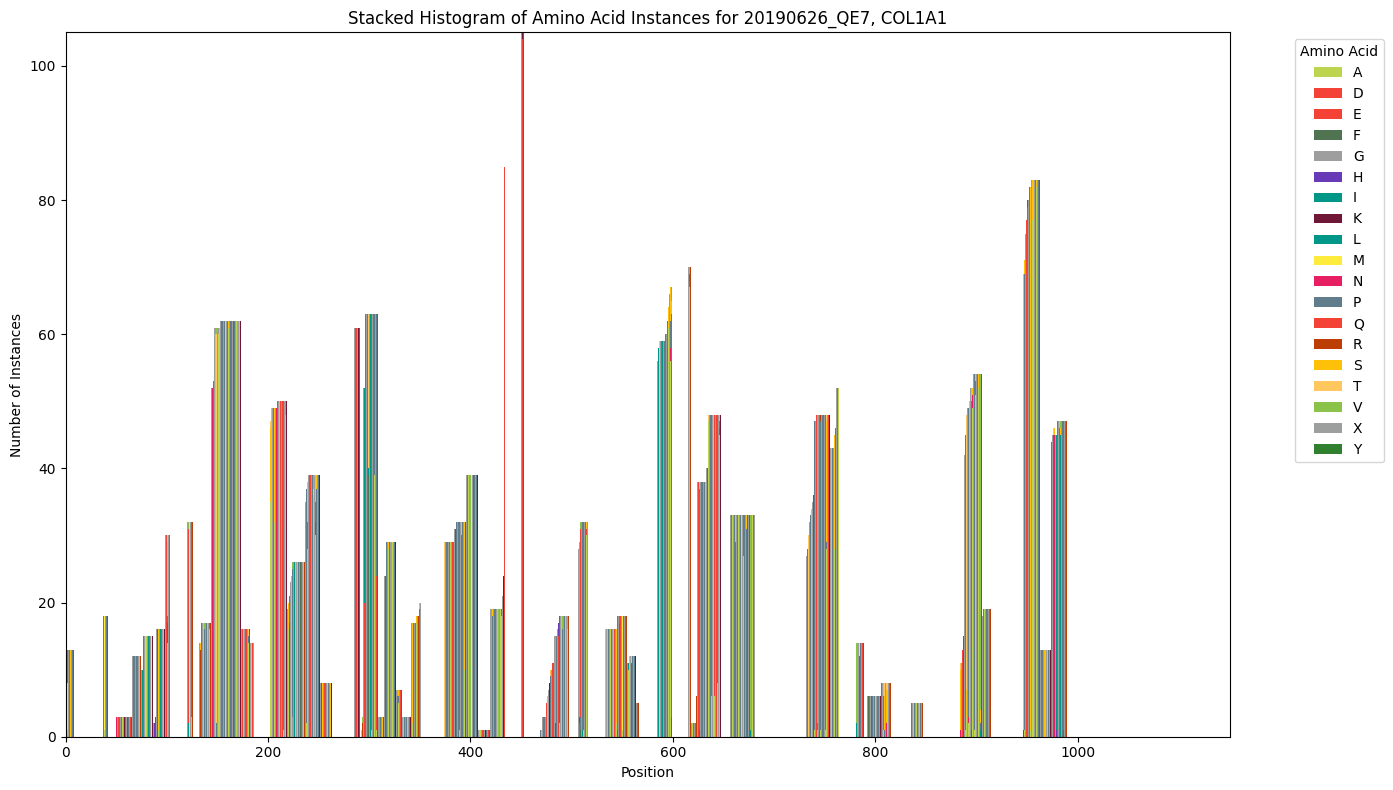

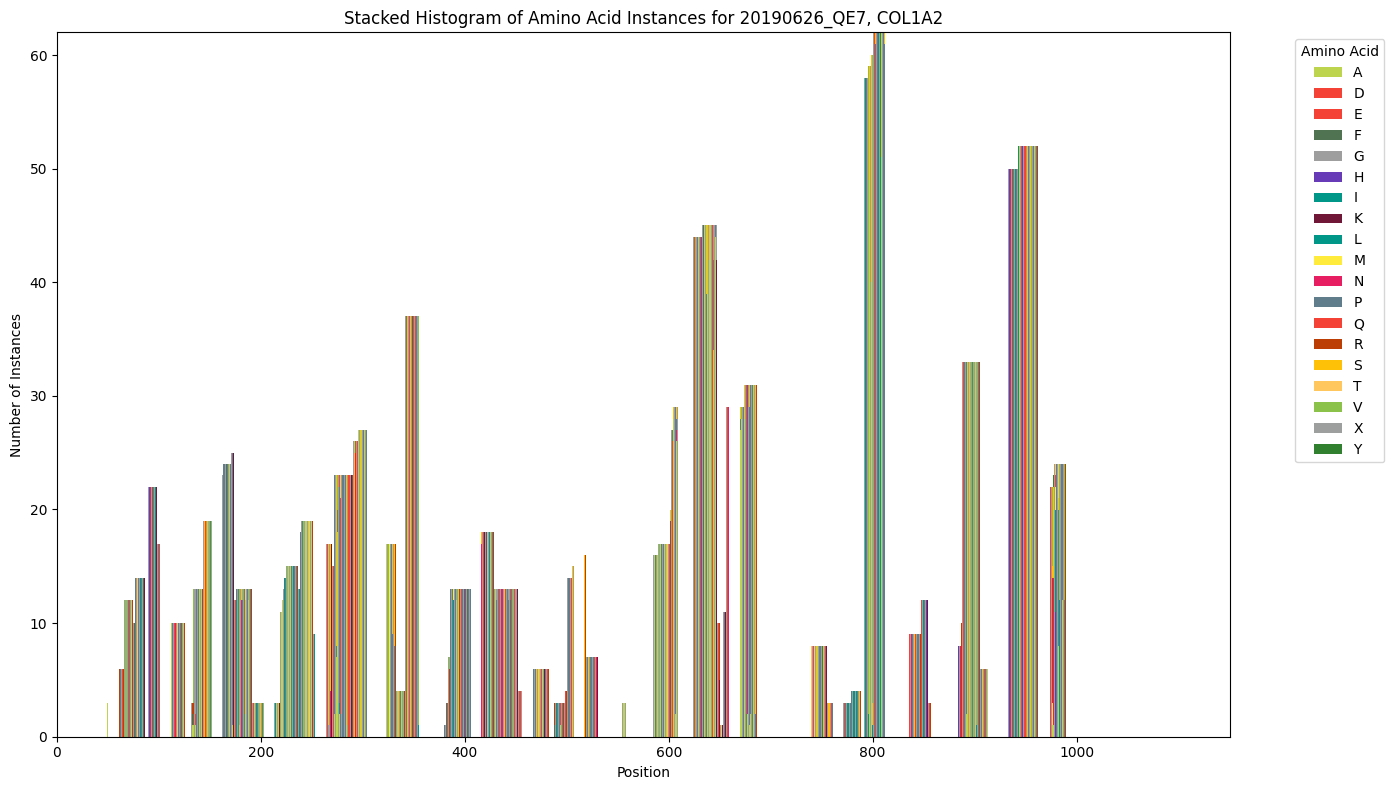

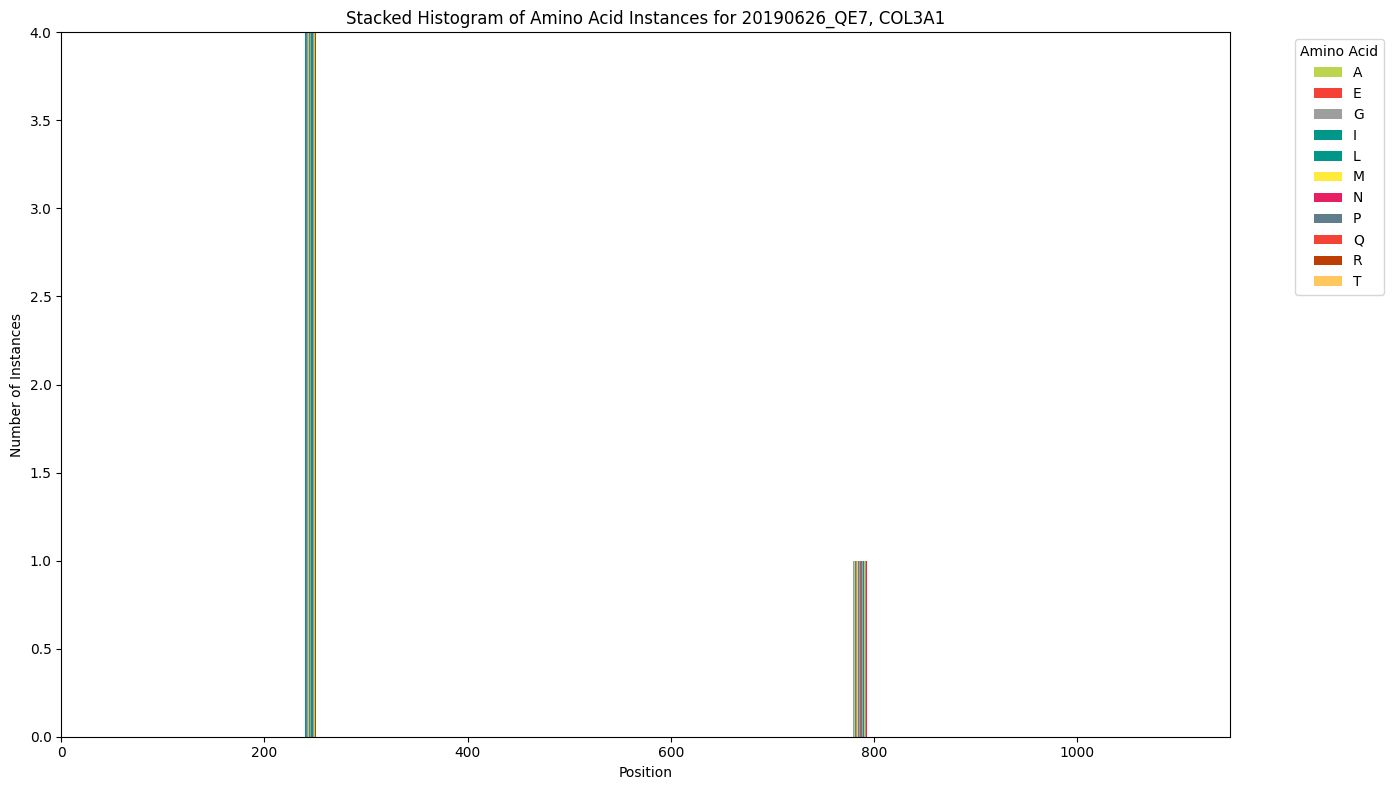

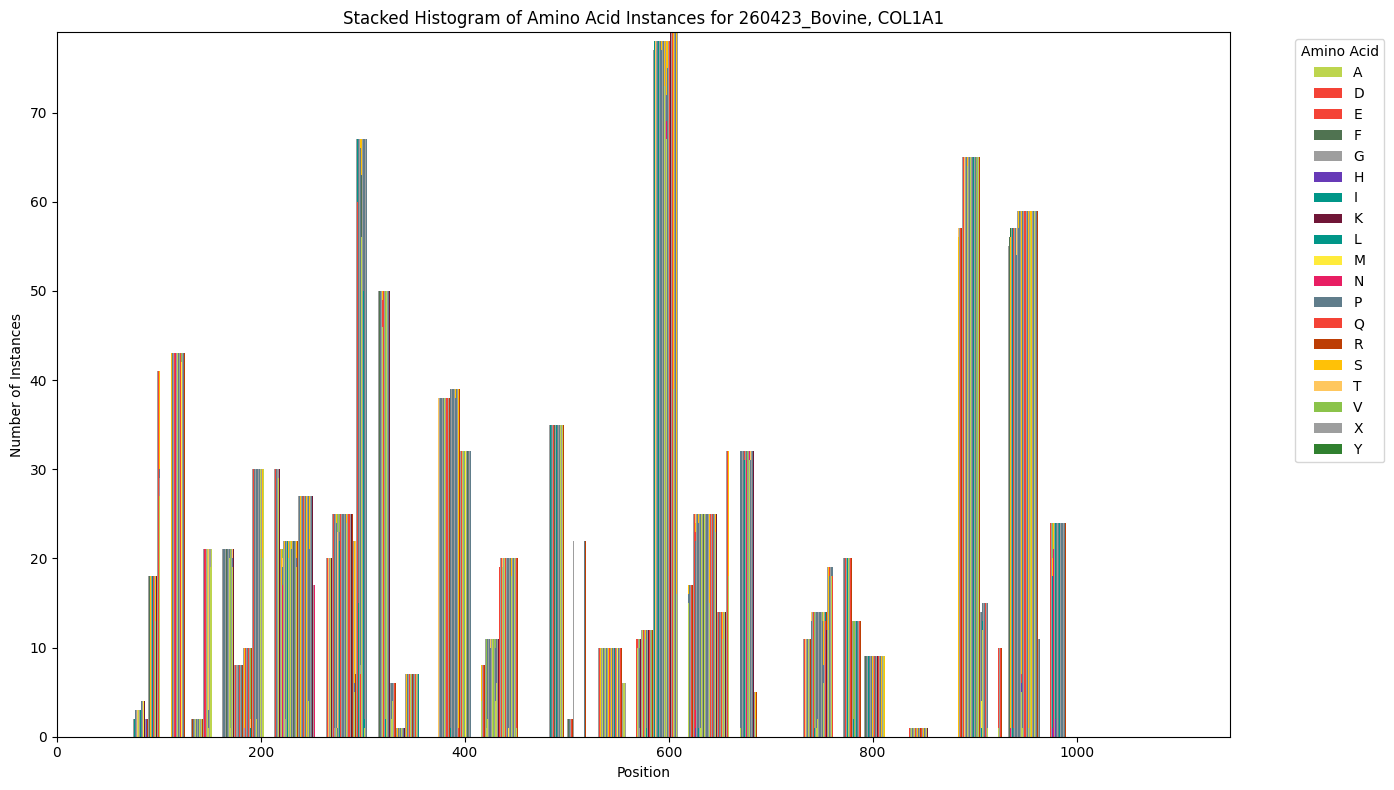

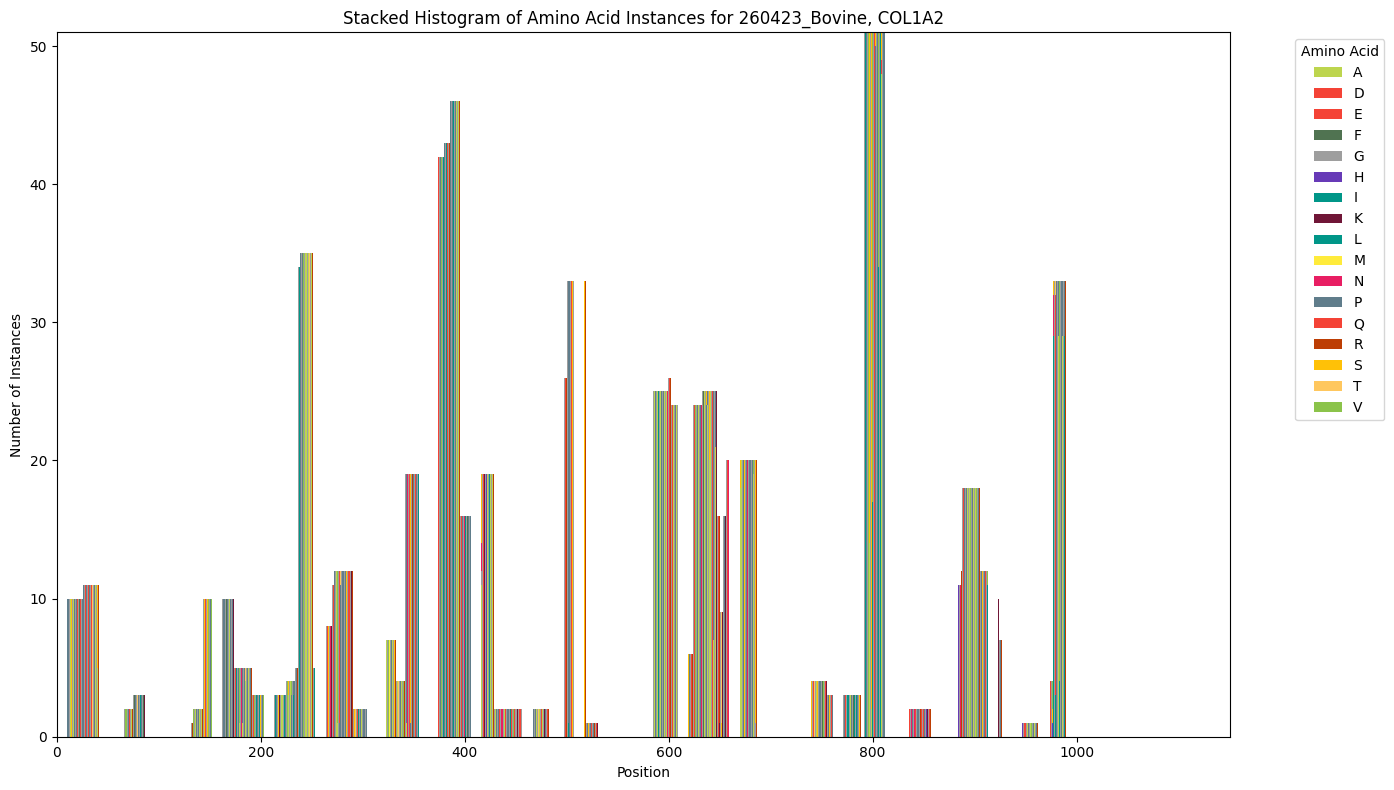

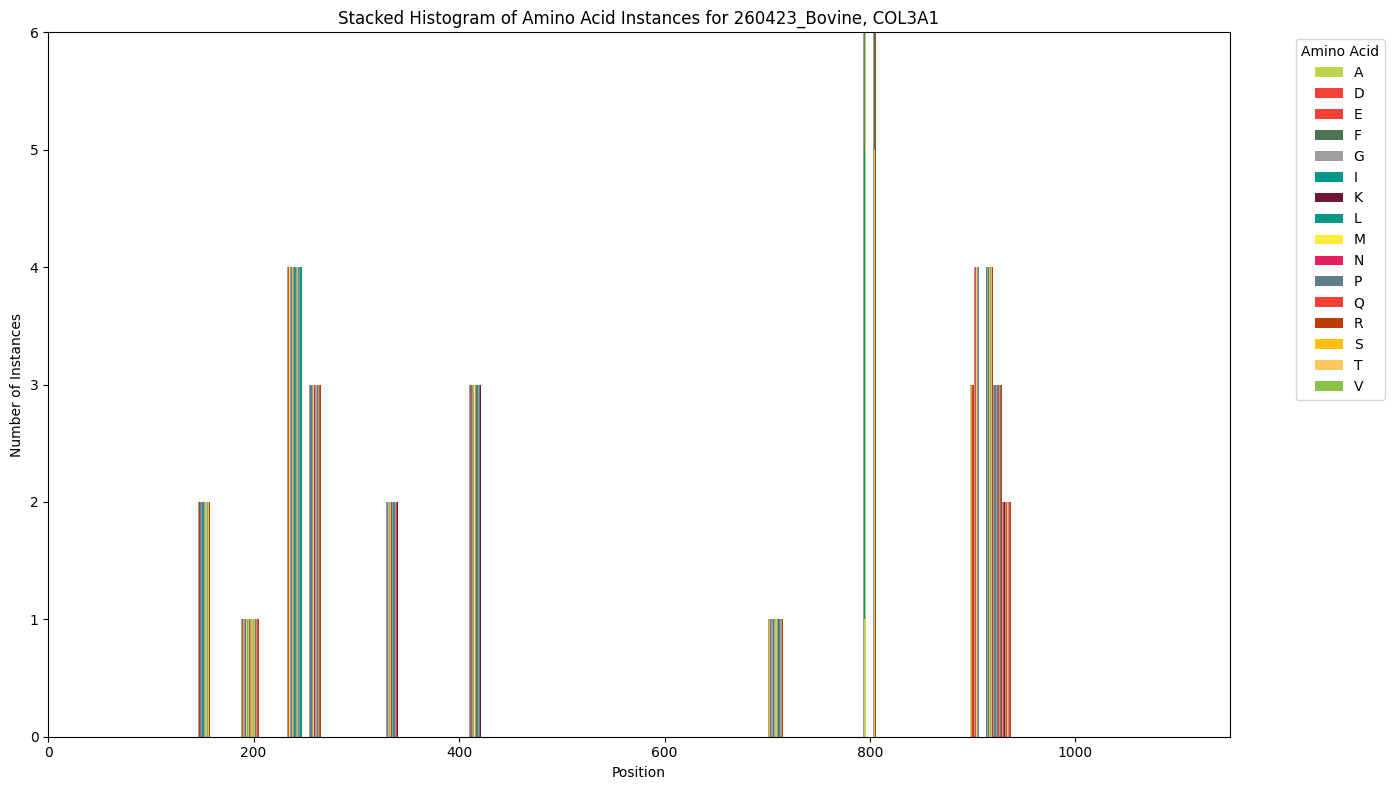

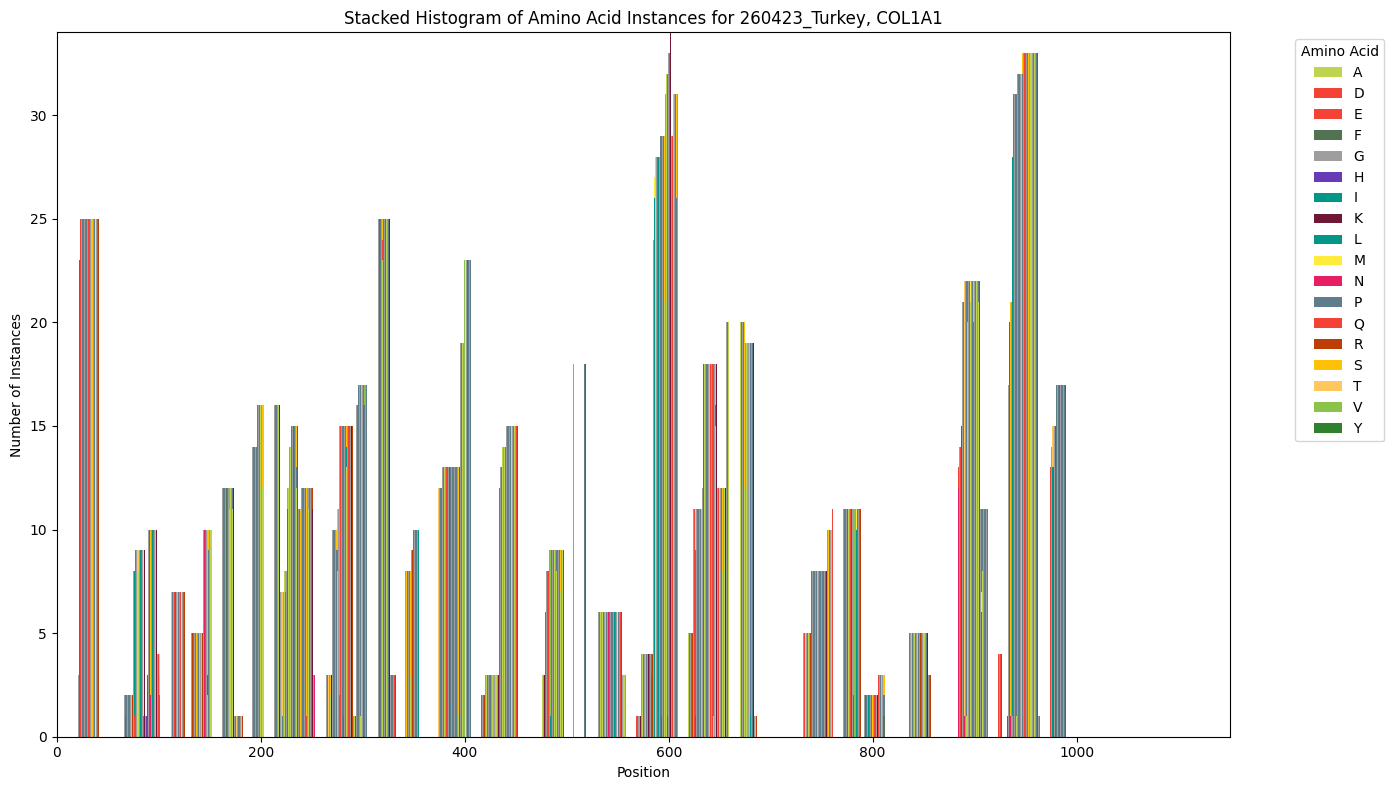

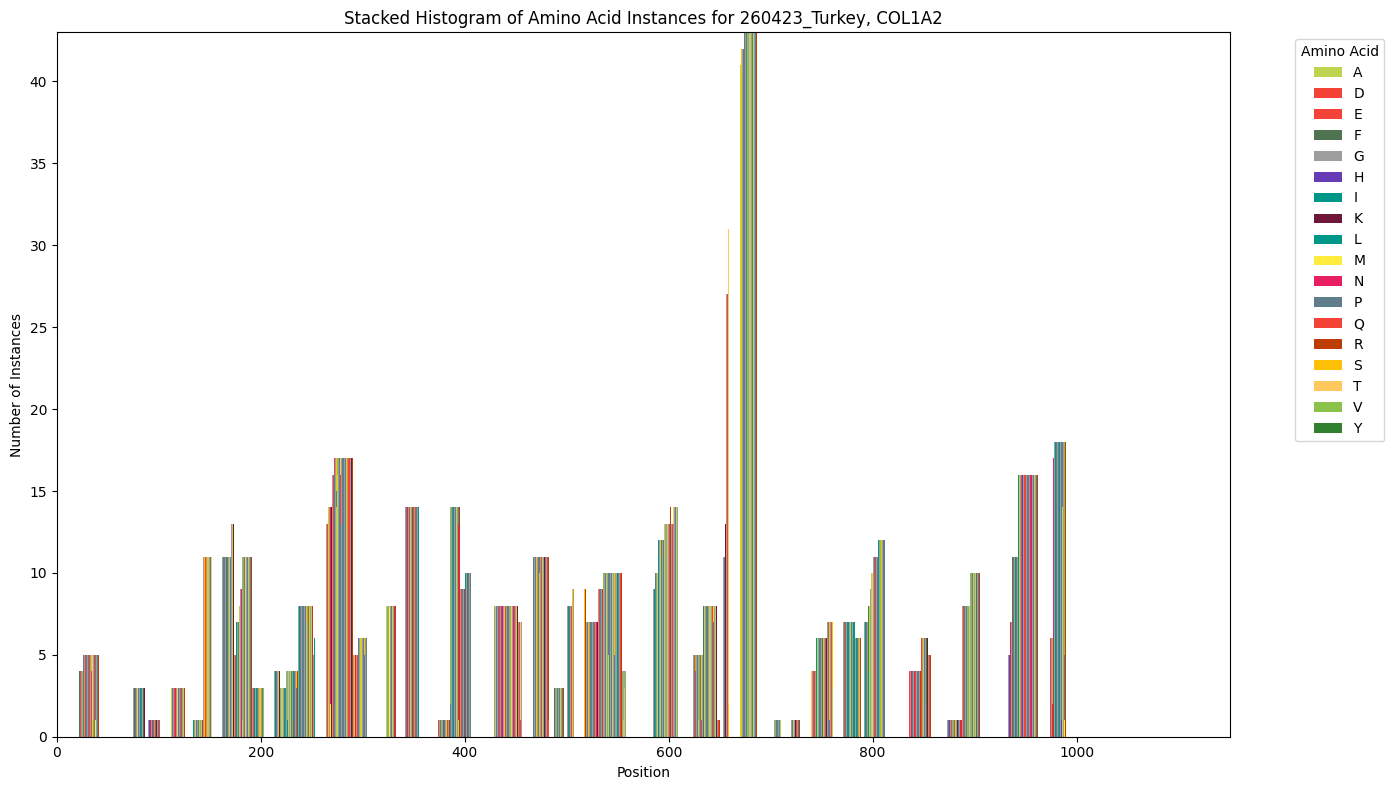

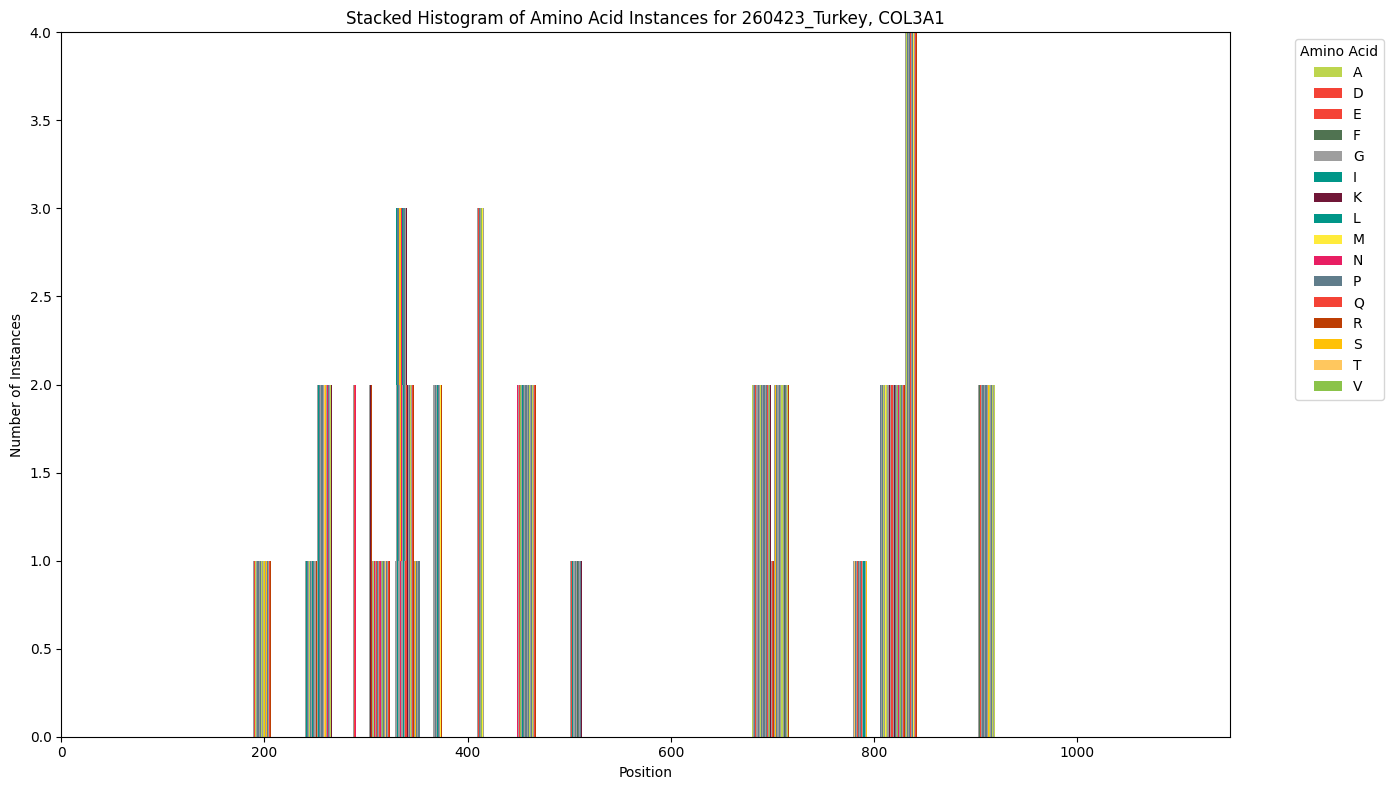

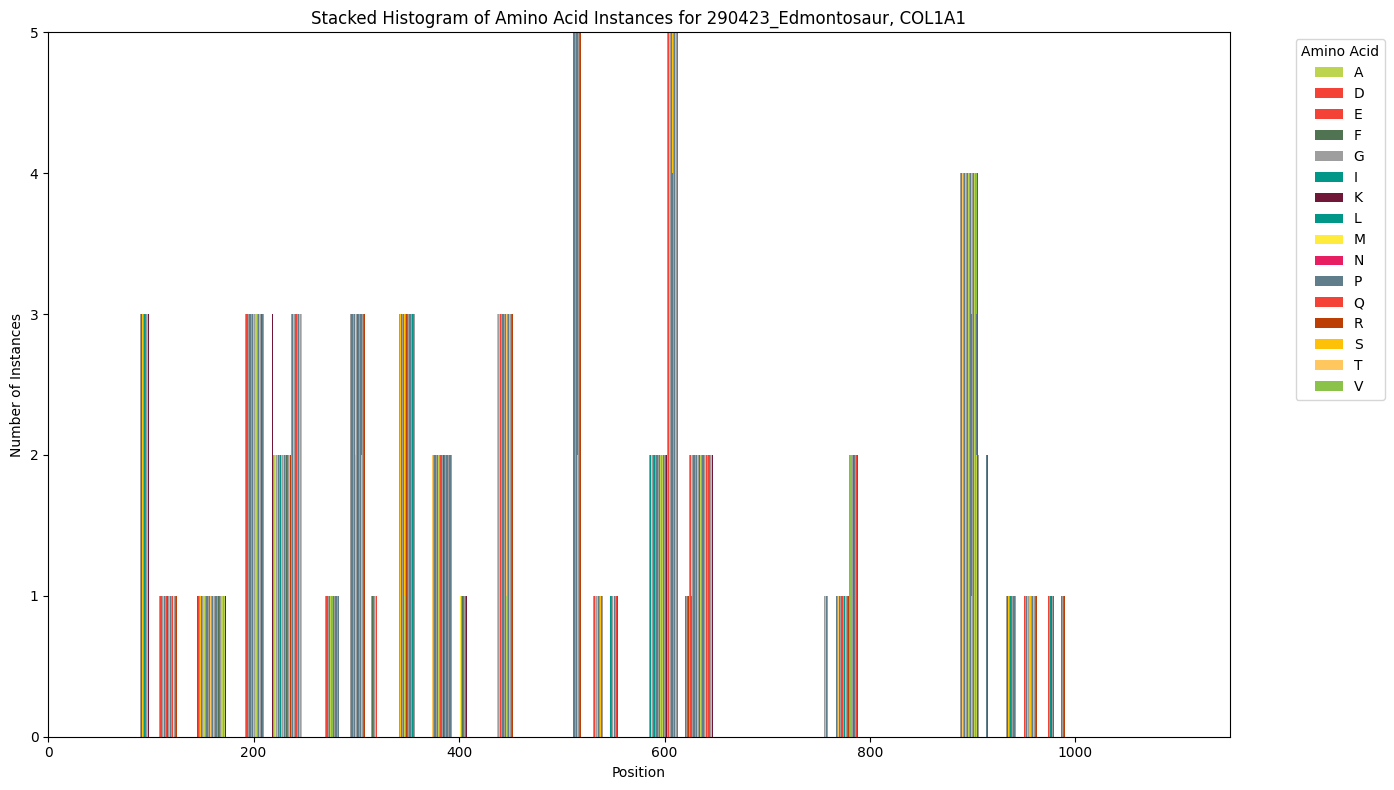

KeyboardInterrupt: 

In [ ]:
# Group the DataFrame by 'sample_name', 'GCN', and 'GCN_species'
grouped = exp_df.groupby(['sample_name', 'GCN'])#, 'GCN_species'])

for (sample_name, GCN), group in grouped:
    # Group by 'position' and 'aa', then count instances
    aa_counts = group.groupby(['position', 'aa']).size().unstack(fill_value=0)

    # Adjusted to ensure all positions from 0 to 1150 are included
    all_positions = range(0, 1151)  # Python ranges are exclusive at the end, so 1151 is not included
    aa_counts = aa_counts.reindex(all_positions, fill_value=0)

    # Prepare data for stacking in histogram
    bottoms = np.zeros(len(aa_counts))

    # Set up the plot
    plt.figure(figsize=(14, 8))

    # Colors for amino acids
    amino_acids = list(aa_counts.columns)
    colors = [amino_acids_colors.get(aa, '#000000') for aa in amino_acids]  # Fallback to black if aa not in color dict

    for aa, color in zip(amino_acids, colors):
        plt.bar(aa_counts.index, aa_counts[aa], bottom=bottoms, label=aa, color=color)
        bottoms += aa_counts[aa].values

    plt.title(f'Stacked Histogram of Amino Acid Instances for {sample_name}, {GCN}')
    plt.xlabel('Position')
    plt.ylabel('Number of Instances')
    plt.xlim(0, 1150)  # Set the x-axis limits from 0 to 1150
    plt.legend(title='Amino Acid', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
# Group the DataFrame by 'sample_name', 'GCN', and 'GCN_species'
grouped = exp_df.groupby(['sample_name', 'GCN', 'GCN_species'])

for (sample_name, GCN, GCN_species), group in grouped:
    # Group by 'position' and 'aa', then count instances
    aa_counts = group.groupby(['position', 'ptm']).size().unstack(fill_value=0)

    # Ensure all positions are included, even if some have no data
    all_positions = range(group['position'].min(), group['position'].max() + 1)
    aa_counts = aa_counts.reindex(all_positions, fill_value=0)

    # Prepare data for stacking in histogram
    bottoms = np.zeros(len(aa_counts))

    # Set up the plot
    plt.figure(figsize=(14, 8))

    # Colors for amino acids


    for aa, color in zip(amino_acids, colors):
        plt.bar(aa_counts.index, aa_counts[aa], bottom=bottoms, label=aa, color=color)
        bottoms += aa_counts[aa].values

    plt.title(f'Stacked Histogram of Modification for {sample_name}, {GCN}, {GCN_species}')
    plt.xlabel('Position')
    plt.ylabel('Number of Instances')
    plt.legend(title='Modifications', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
# Select a GCN for demonstration. Replace 'COL1A1' with your GCN of interest
gcn_of_interest = 'COL1A2'
df_gcn = df_top[df_top['GCN'] == gcn_of_interest]

# Group by position and aa, then count instances
aa_counts = df_gcn.groupby(['position', 'aa']).size().unstack(fill_value=0)

# Ensure all positions are included, even if some have no data
all_positions = range(df_gcn['position'].min(), df_gcn['position'].max() + 1)
aa_counts = aa_counts.reindex(all_positions, fill_value=0)

# Prepare data for stacking in histogram
bottoms = np.zeros(len(aa_counts))

# Set up the plot
plt.figure(figsize=(14, 8))

# Colors for amino acids
amino_acids = list(aa_counts.columns)
colors = [amino_acids_colors.get(aa, '#000000') for aa in amino_acids]  # Fallback to black if aa not in color dict

for aa, color in zip(amino_acids, colors):
    plt.bar(aa_counts.index, aa_counts[aa], bottom=bottoms, label=aa, color=color)
    bottoms += aa_counts[aa].values

plt.title(f'Stacked Histogram of Amino Acid Instances for {gcn_of_interest}')
plt.xlabel('Position')
plt.ylabel('Number of Instances')
plt.legend(title='Amino Acid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming exp_df is your DataFrame

# Calculate the percentage of modified sites per position
# First, calculate total instances and modified instances per position
mod_counts = exp_df.groupby(['position', 'GCN_species', 'ptm']).size().unstack(fill_value=0)
total_counts = exp_df.groupby(['position', 'GCN_species']).size().rename('total')

# Join the counts to calculate percentages
mod_counts = mod_counts.join(total_counts)
mod_counts['percentage'] = mod_counts.apply(lambda row: row[1] / row['total'] * 100, axis=1)

# Prepare data for plotting
positions = mod_counts.index.get_level_values('position').unique()
gcn_species = LabelEncoder().fit_transform(mod_counts.index.get_level_values('GCN_species'))
sizes = mod_counts['total'] * 10  # Scale the sizes as needed
colors = gcn_species

# Create the scatter plot
fig, ax = plt.subplots(figsize=(14, 8))
scatter = ax.scatter(positions, mod_counts['percentage'], c=colors, s=sizes, alpha=0.7, edgecolors='none', cmap="Set1")
ax.set_title('Percentage of Modified Sites by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Percentage of Modified Sites')
ax.grid(visible=True, which='major', axis='both')

# Add a color legend for GCN_species
handles, labels = scatter.legend_elements()
actual_labels = LabelEncoder().inverse_transform([int(label) for label in labels])
color_legend = ax.legend(handles, actual_labels, loc="upper left", title="GCN_species", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
